In [2]:
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt
from read_roi import *
import zipfile
from skimage import io

In [1]:
pwd

'C:\\Users\\ST-USER\\jaewon\\DVT_detection\\code'

In [3]:
img_path='C:/Users/ST-USER/jaewon/DVT_detection/data/try3/crop'
p_name=sorted(os.listdir(img_path))
img_names= sorted(glob.glob(img_path+'/*'))


rfile_path= 'C:/Users/ST-USER/jaewon/DVT_detection/data/dcm' 
roizip=glob.glob(rfile_path+'/' + p_name[0]+'/*.zip')

#########1p test
zipname=roizip[0][roizip[0].rindex('\\')+1:roizip[0].rindex('.zip')]
roi_zip = zipfile.ZipFile(rfile_path + '/'+p_name[0] +'/'+ zipname +'.zip')
roi_names=roi_zip.namelist()
roi_zip.close()

rois = read_roi_zip(roizip[0])


In [6]:
# for a in range(len(img_names)):
for a in range(1):
    img_list=sorted(glob.glob(img_names[a]+'/*'))
    
print(img_list[67])

C:/Users/ST-USER/jaewon/DVT_detection/data/try3/crop\01013843\01013843_0067.png


In [13]:
print(p_name[0])
print(img_names[0])
print(roizip[0])
print(roi_names[0])


01013843
C:/Users/ST-USER/jaewon/DVT_detection/data/try3/crop\01013843
C:/Users/ST-USER/jaewon/DVT_detection/data/dcm/01013843\01013843.zip
0068-0204-0316.roi


In [4]:
match_number = []
match_int= []
for rn in range(len(roi_names)):
    match_number.append(roi_names[rn][:4])
    match_int.append(int(roi_names[rn][:4]))
    
print(match_number)
print(int(match_number[0]), match_int[0])

['0068', '0069', '0071', '0072', '0073', '0074', '0075', '0076', '0077', '0078', '0079', '0080', '0082', '0112', '0113', '0114', '0115', '0116', '0117', '0118', '0119', '0120', '0121', '0122', '0123', '0127', '0128', '0129', '0130', '0131', '0132', '0133', '0134', '0135', '0136', '0137', '0138', '0139', '0140', '0141', '0142', '0143', '0144', '0144', '0144', '0145', '0146', '0147', '0148', '0149', '0150', '0151', '0152', '0153', '0154', '0155', '0156', '0157']
68 68


C:\Users\ST-USER\anaconda3\envs\zzaem\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


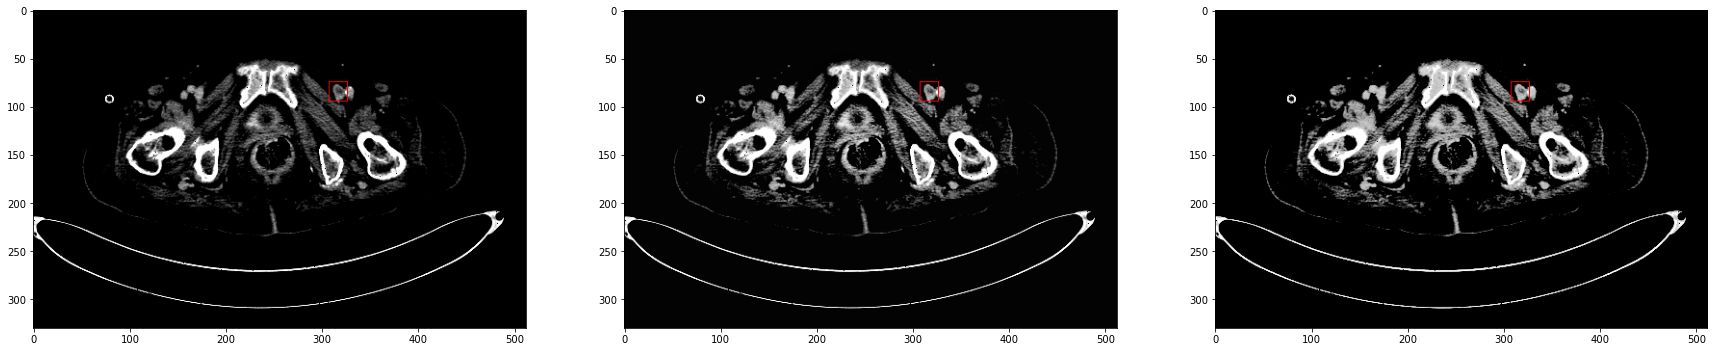

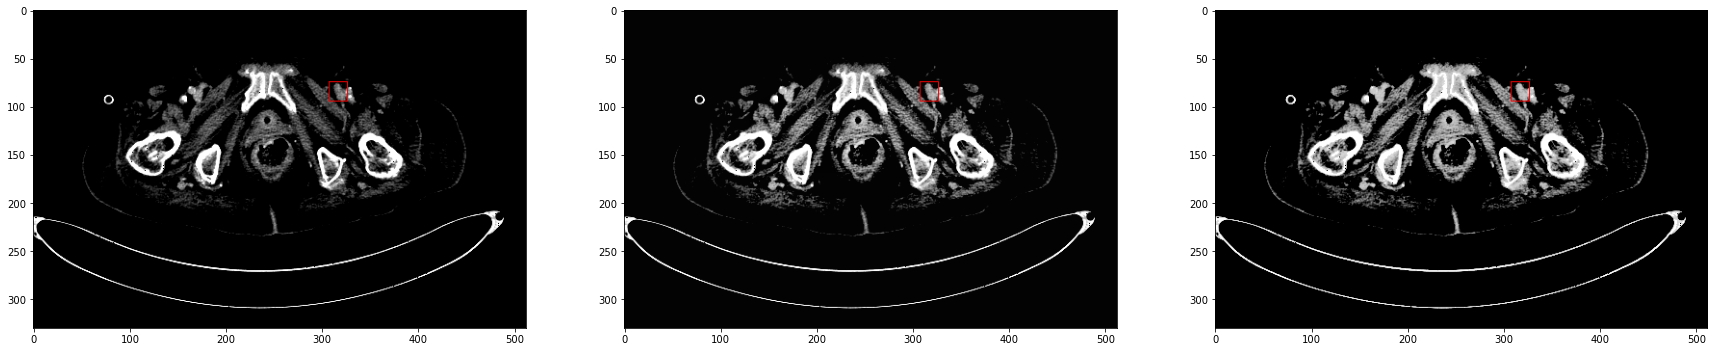

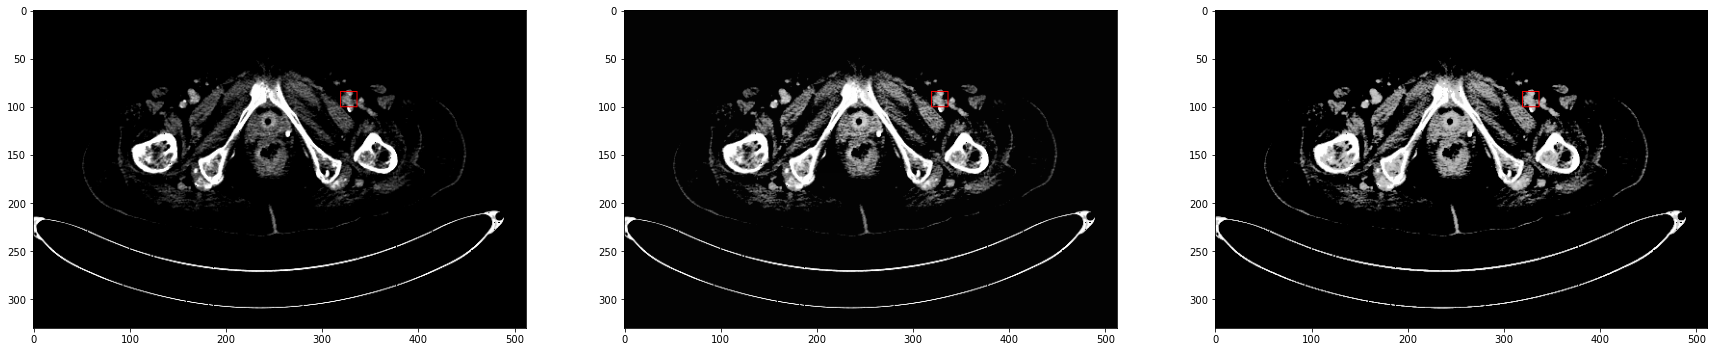

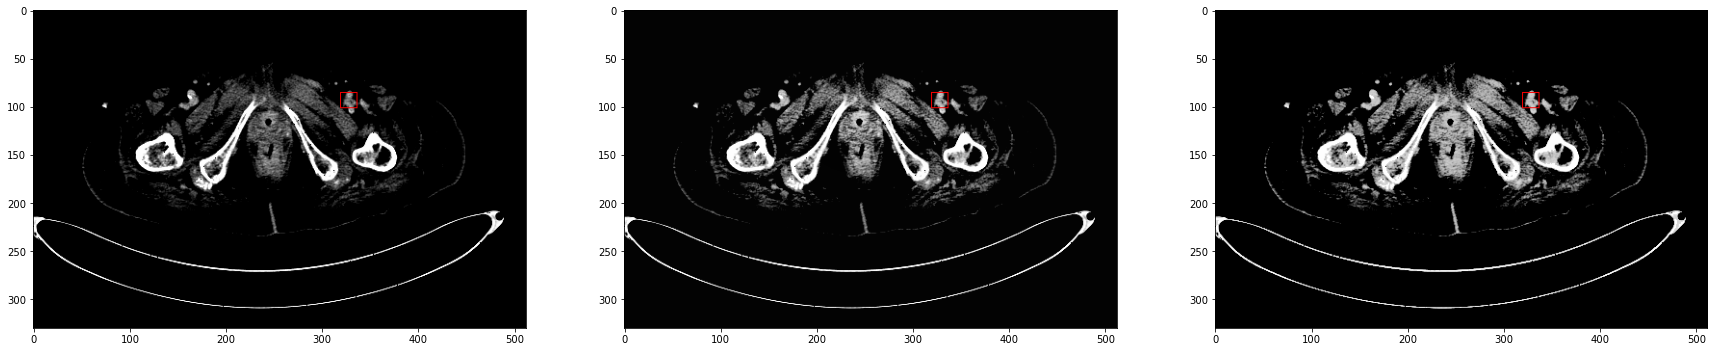

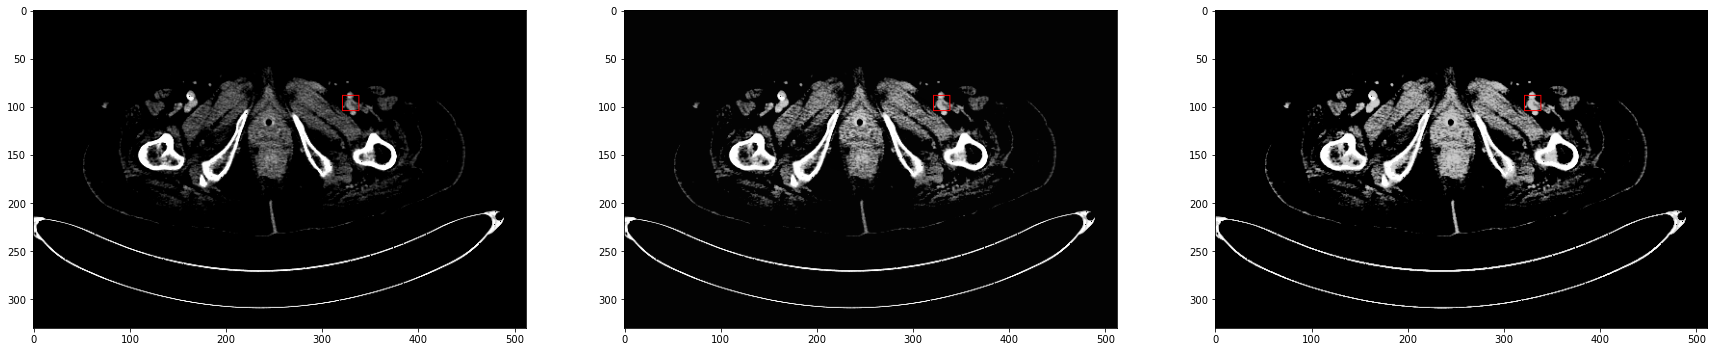

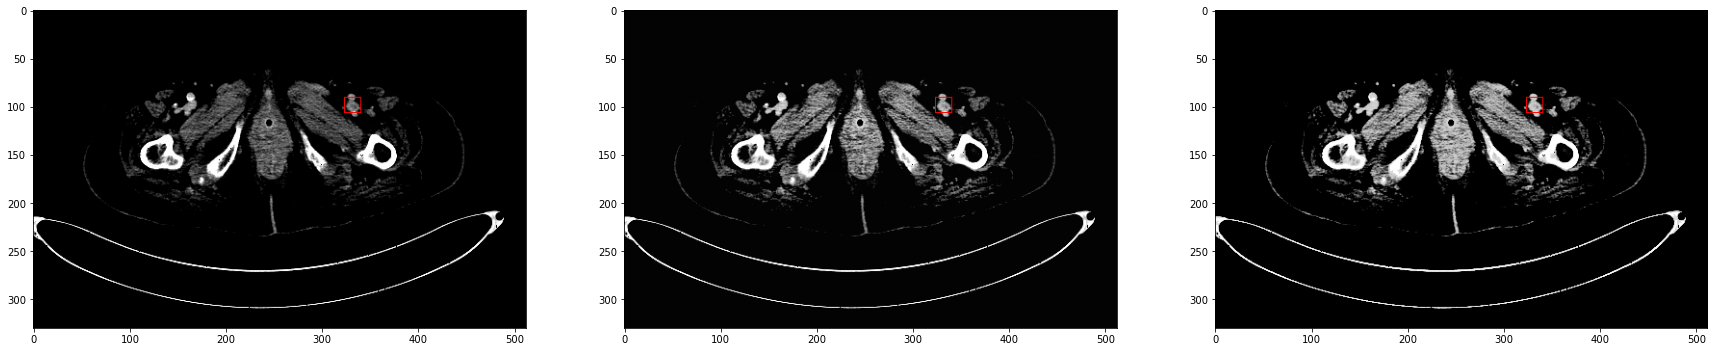

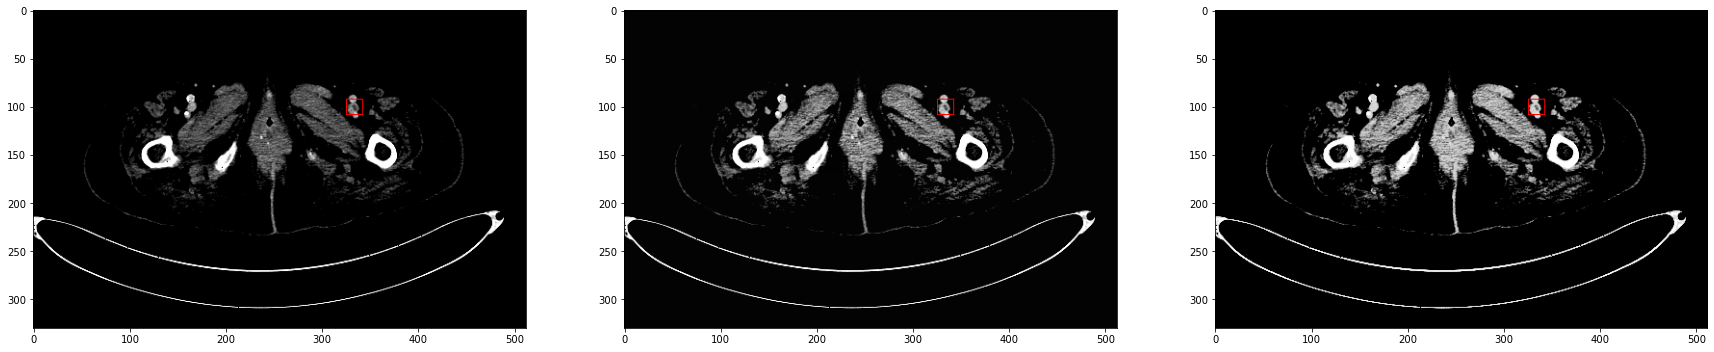

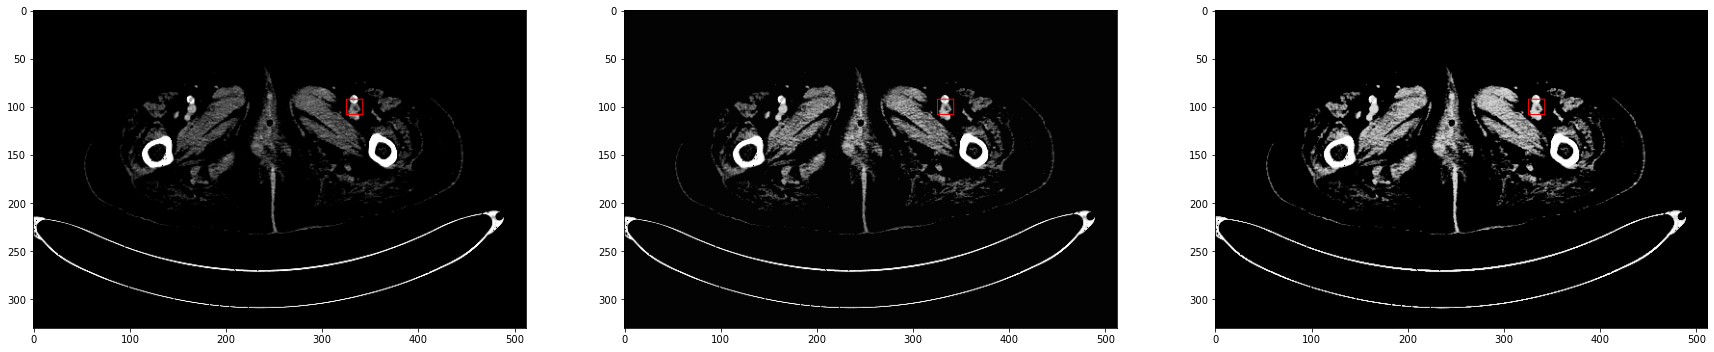

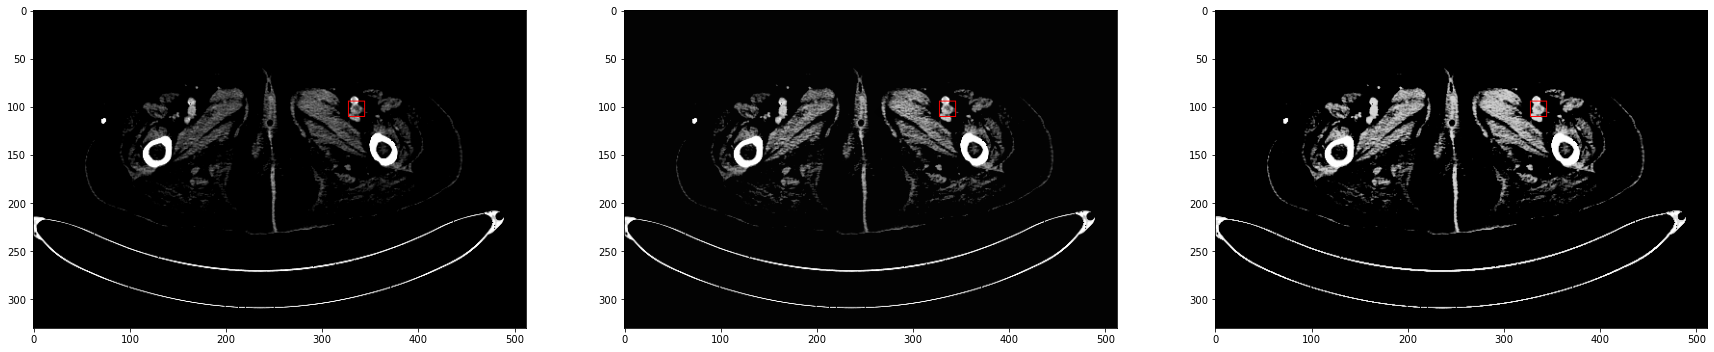

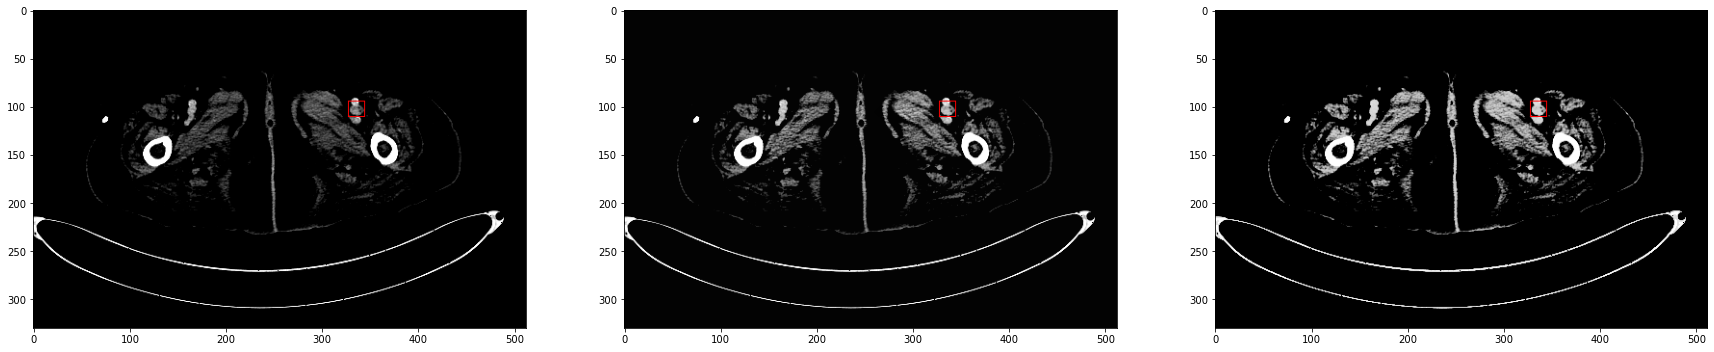

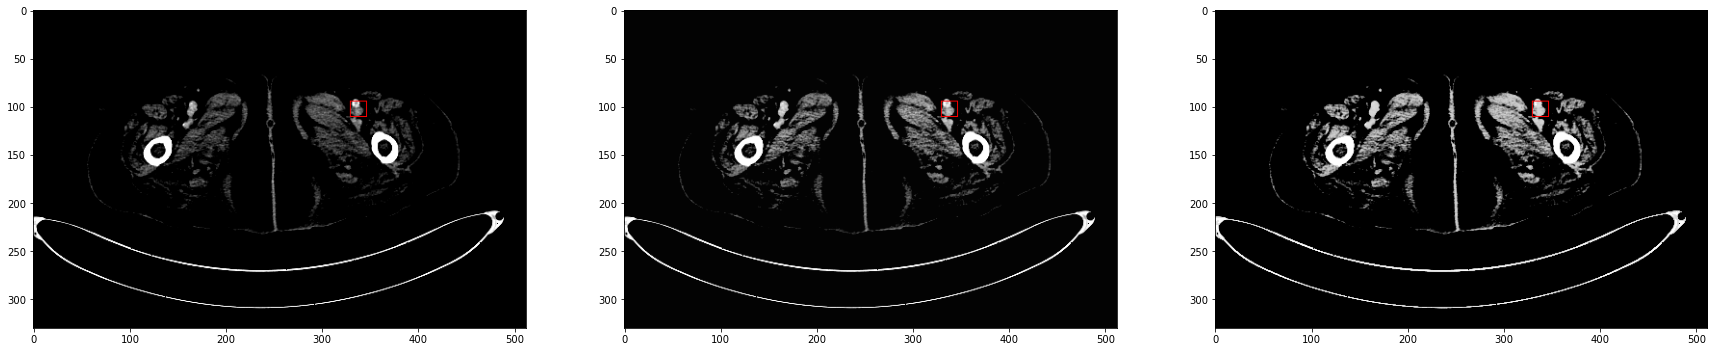

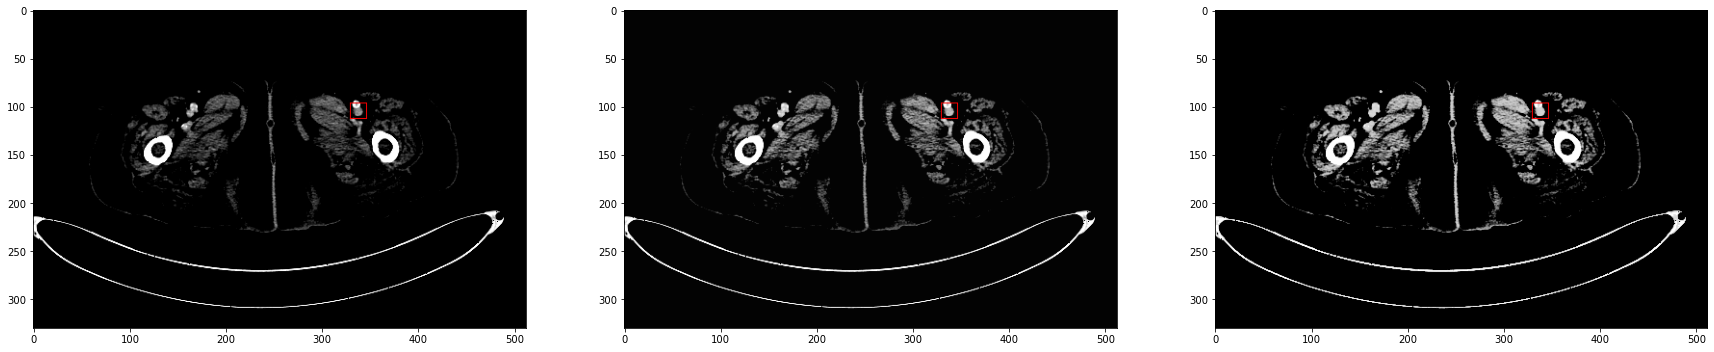

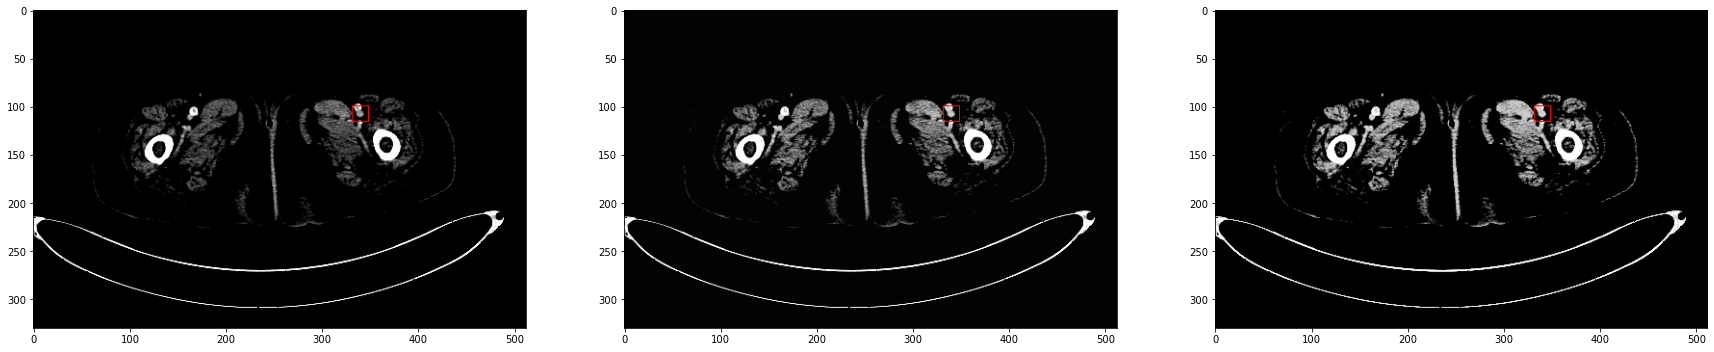

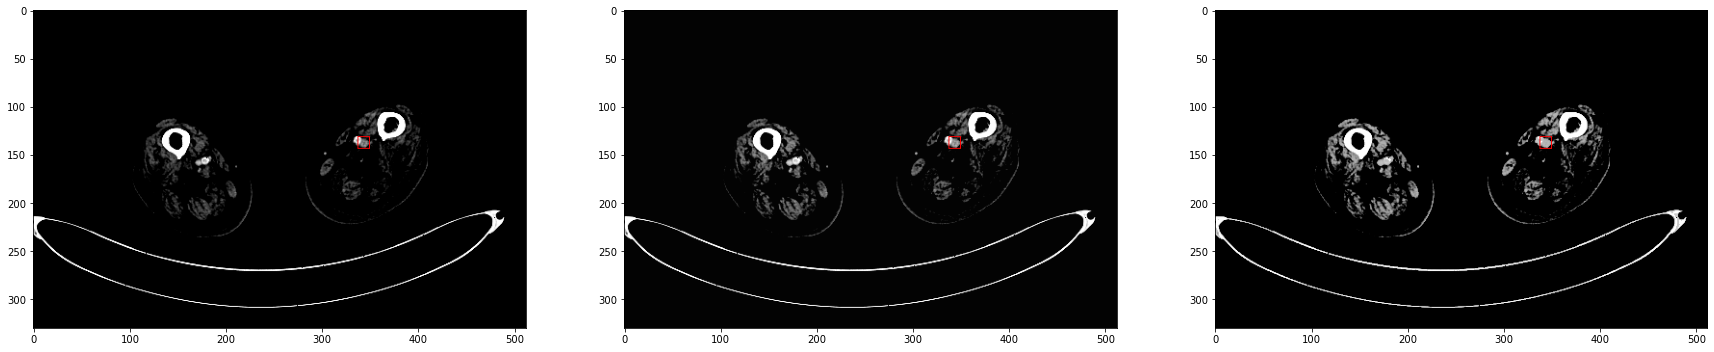

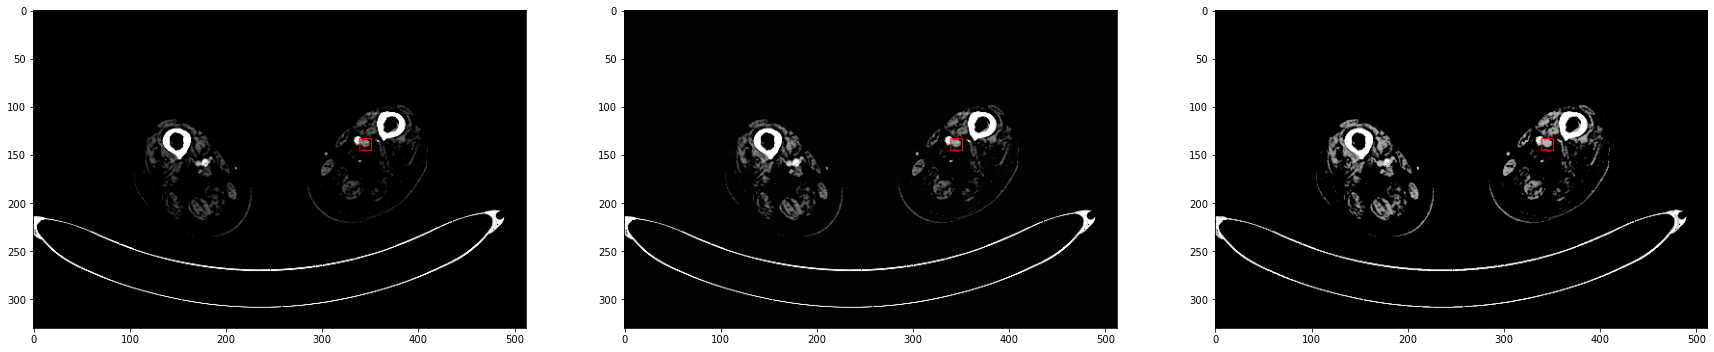

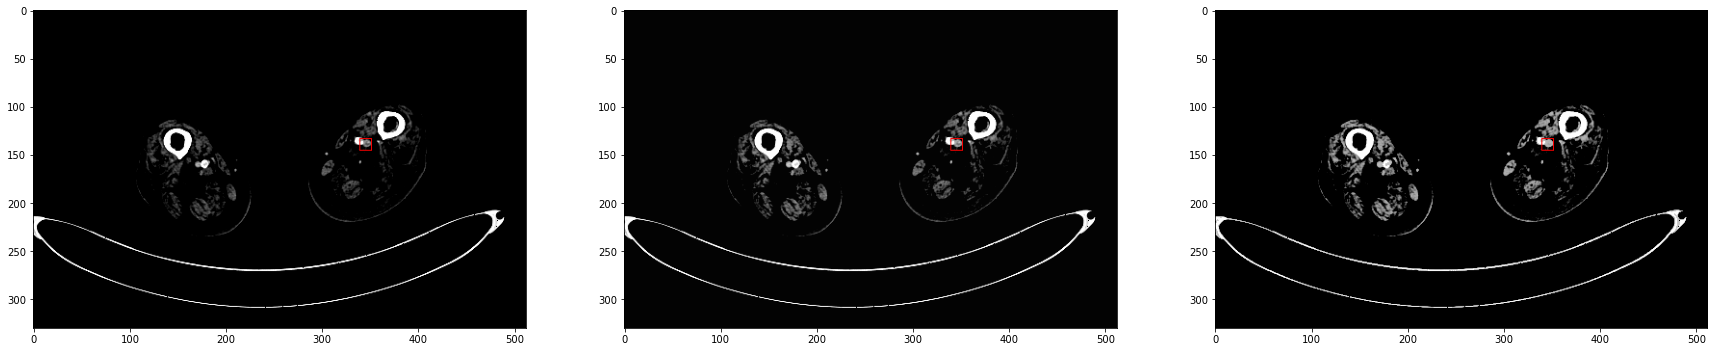

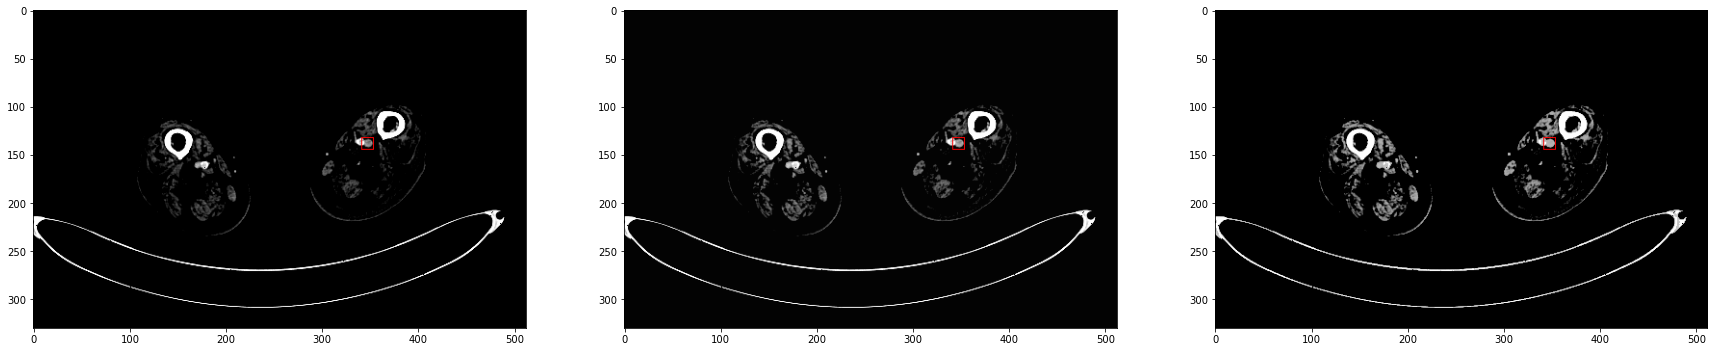

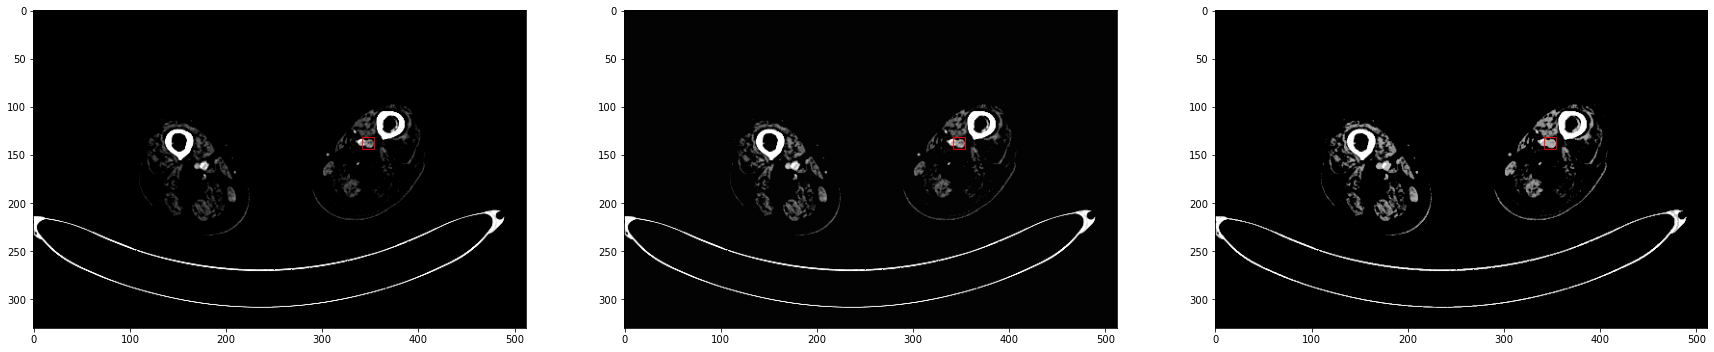

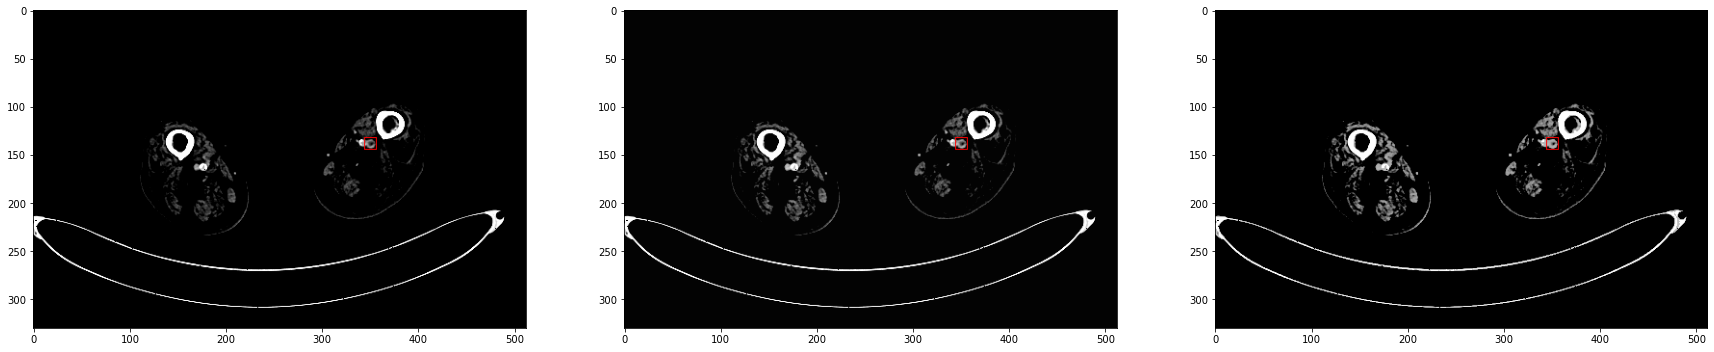

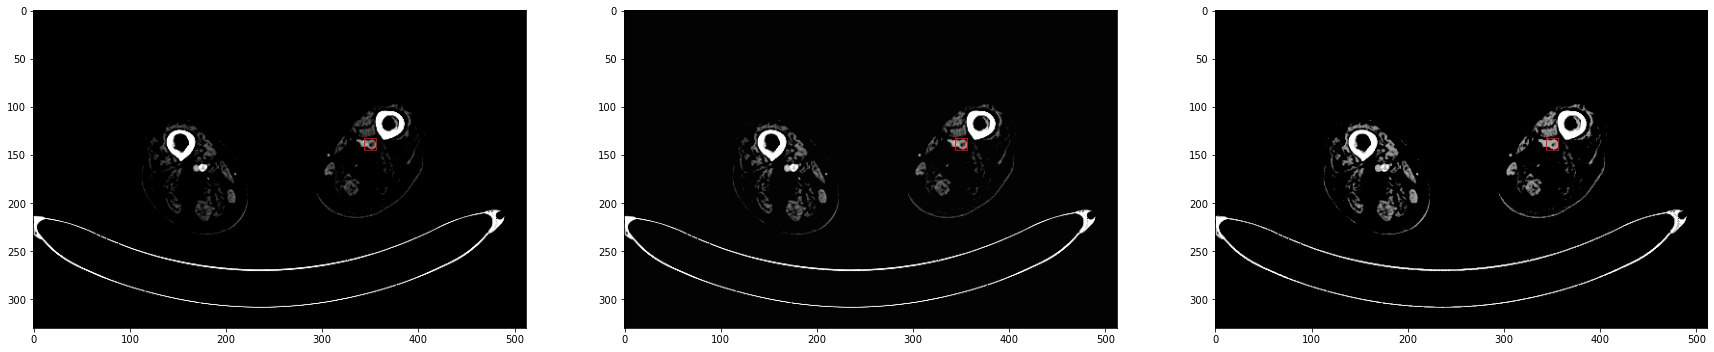

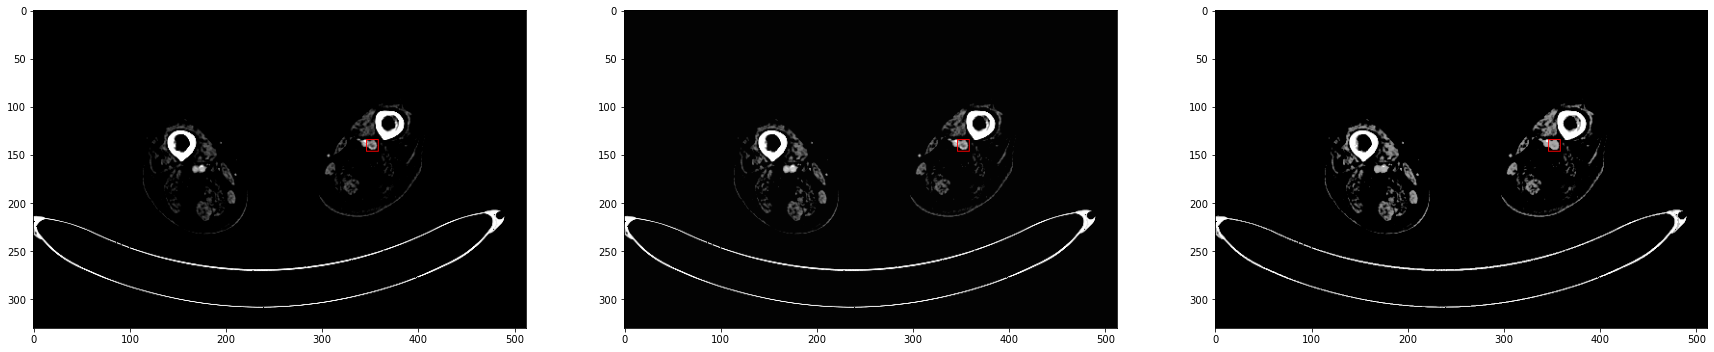

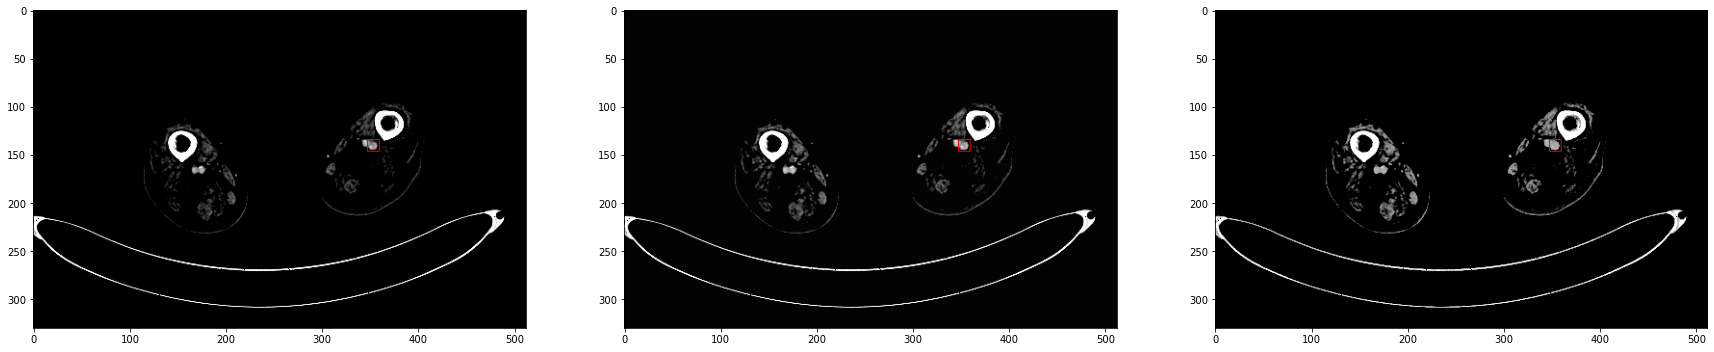

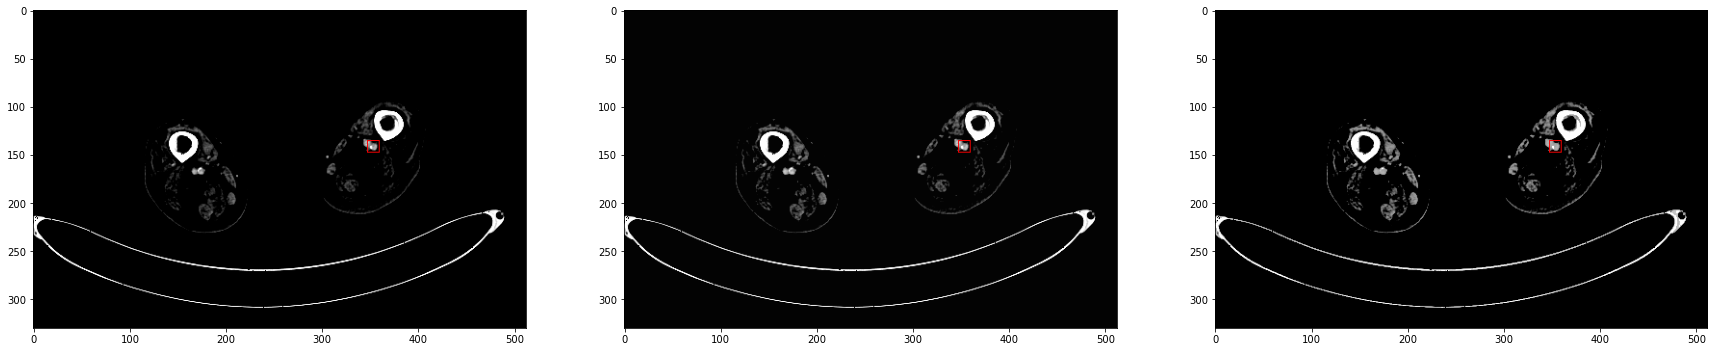

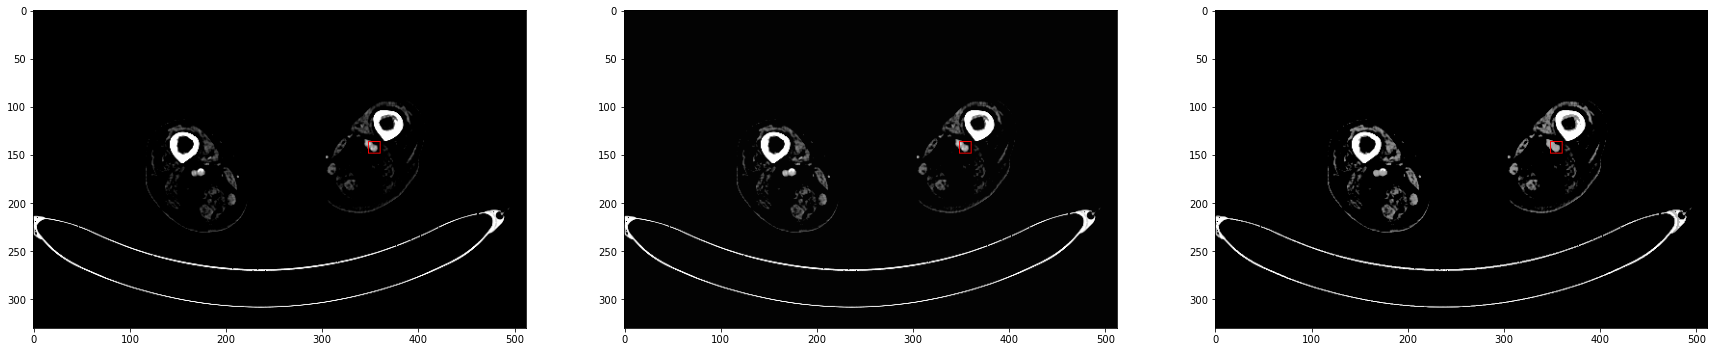

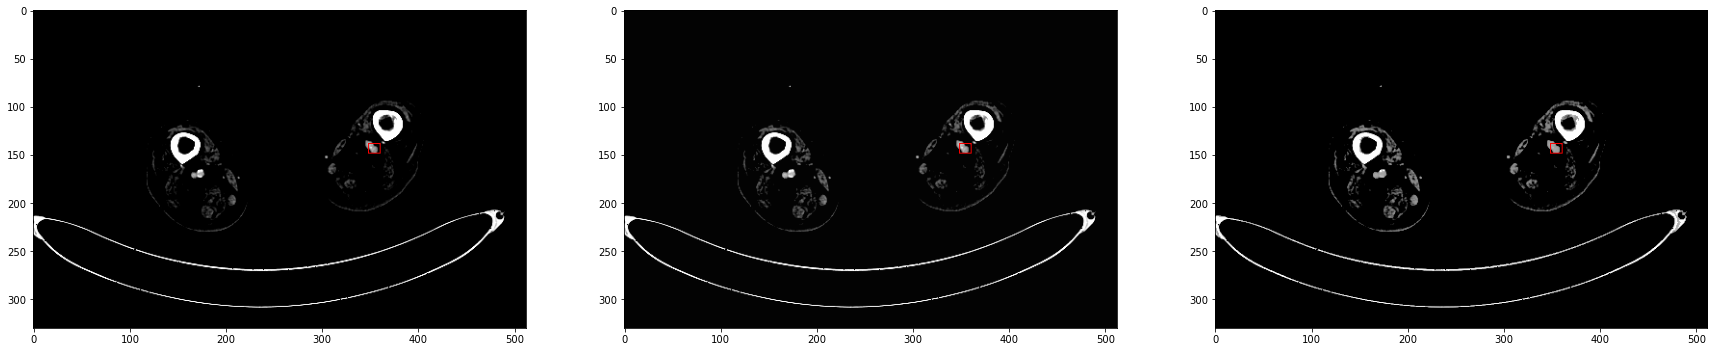

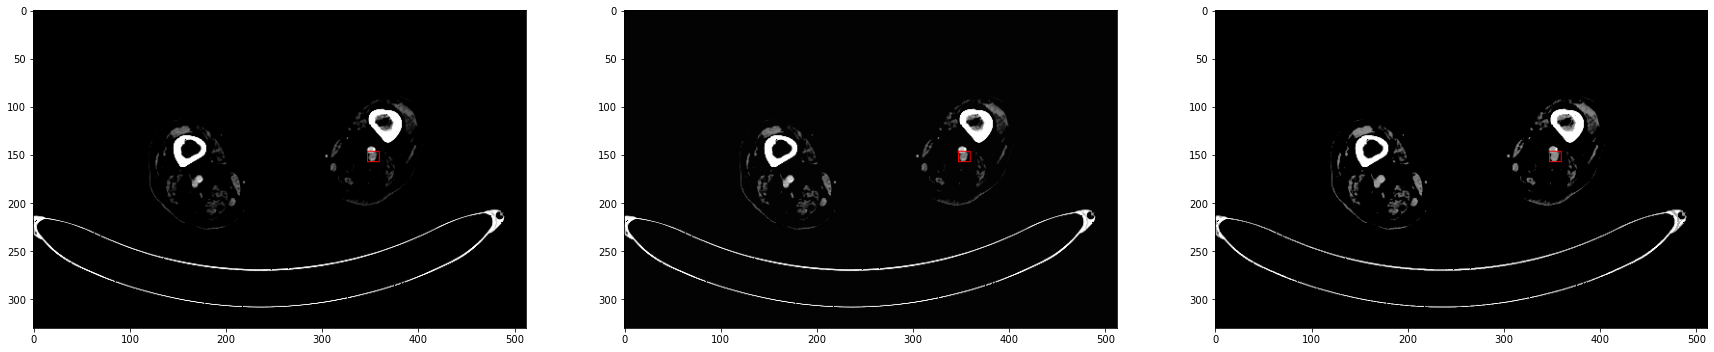

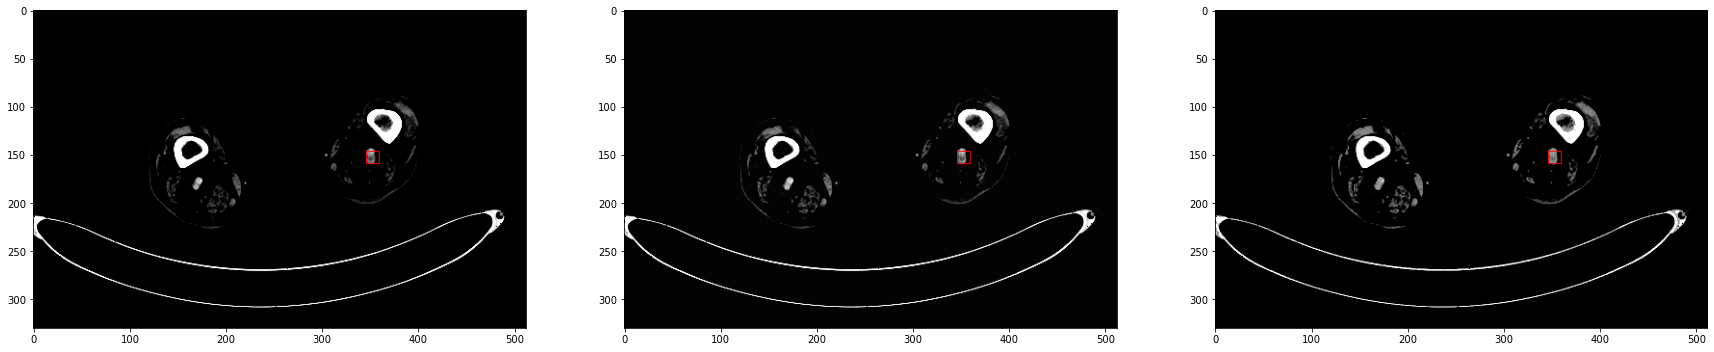

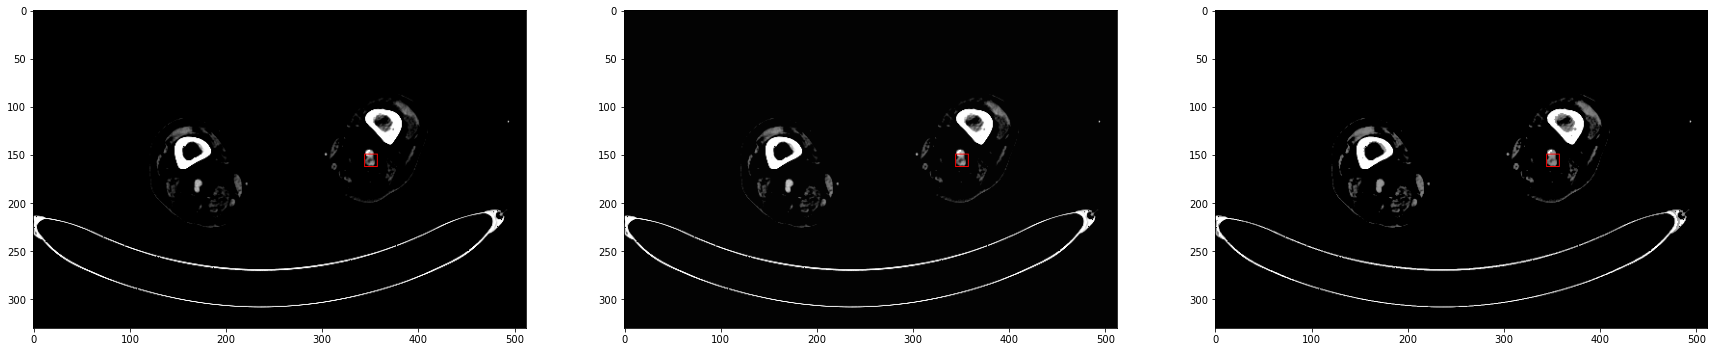

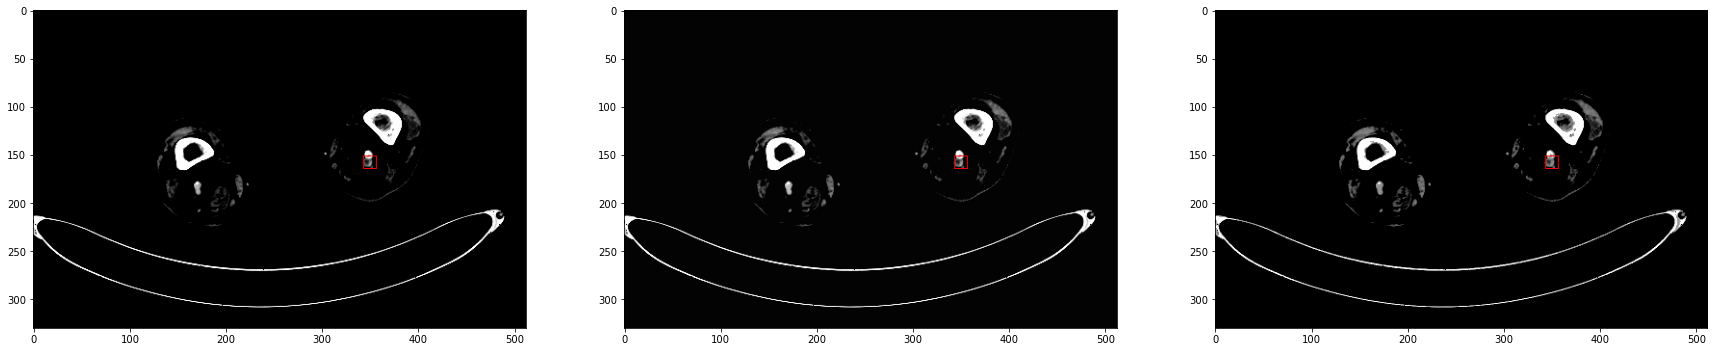

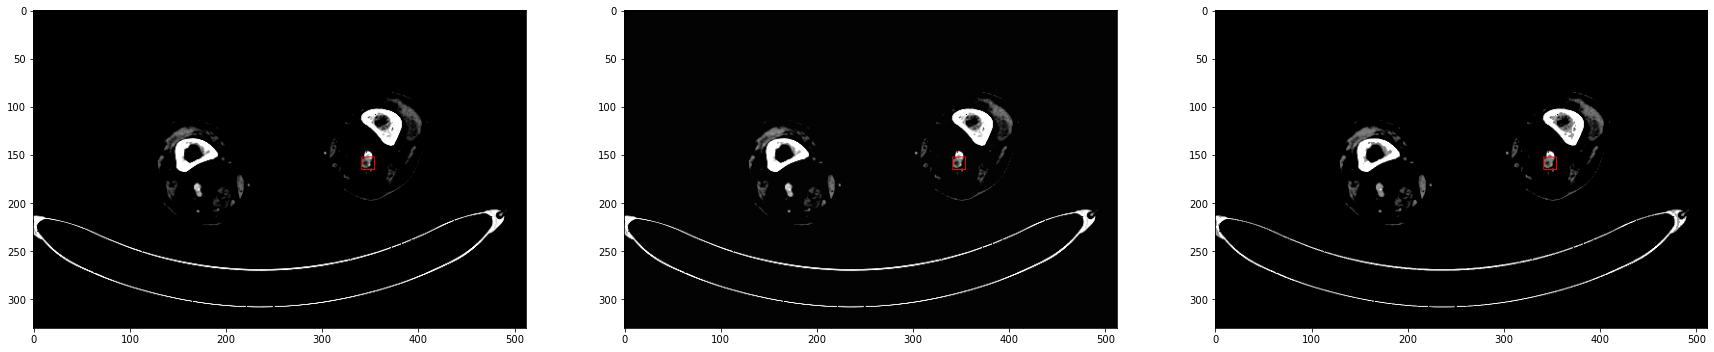

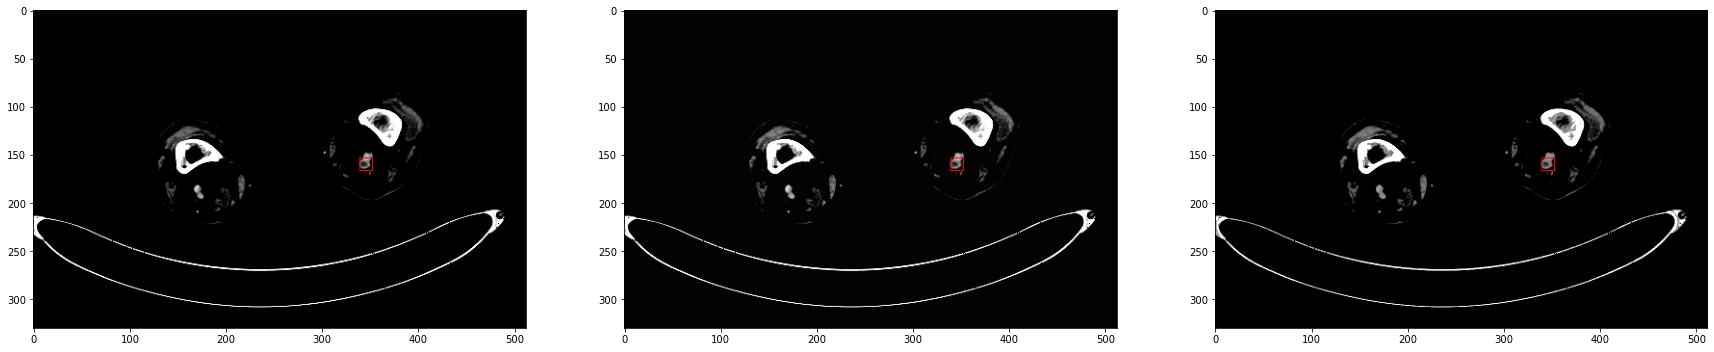

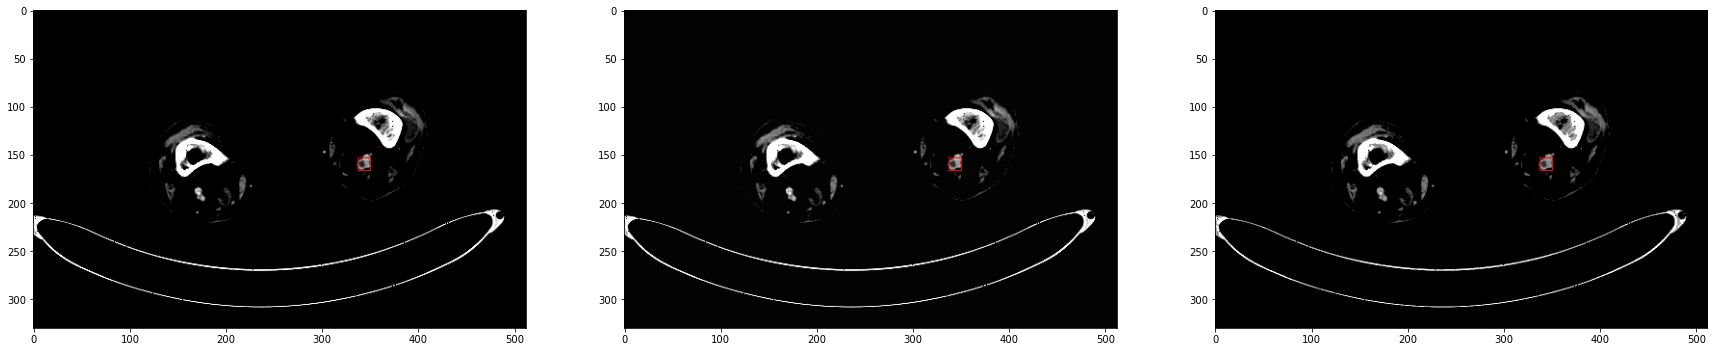

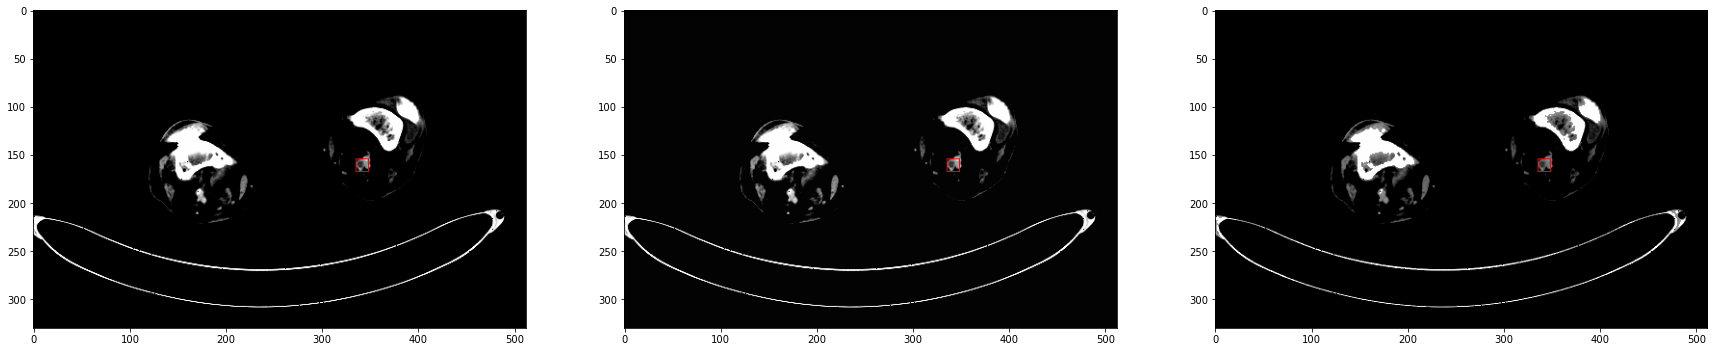

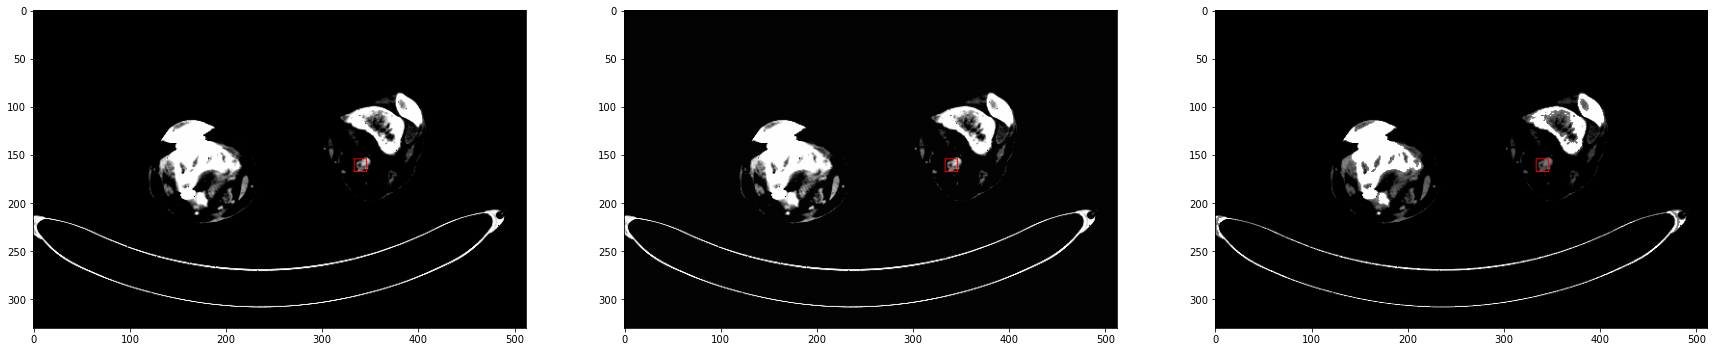

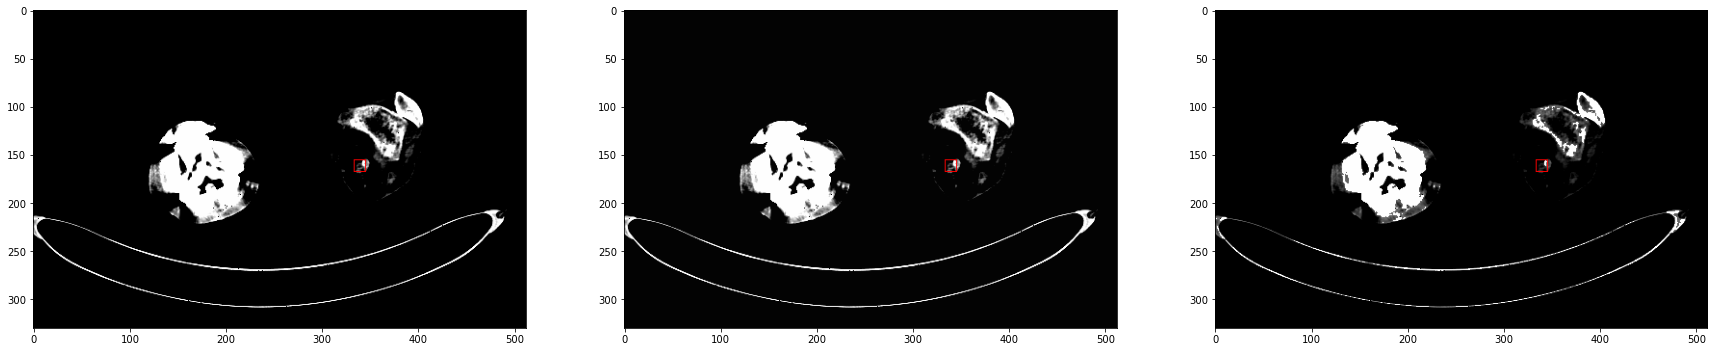

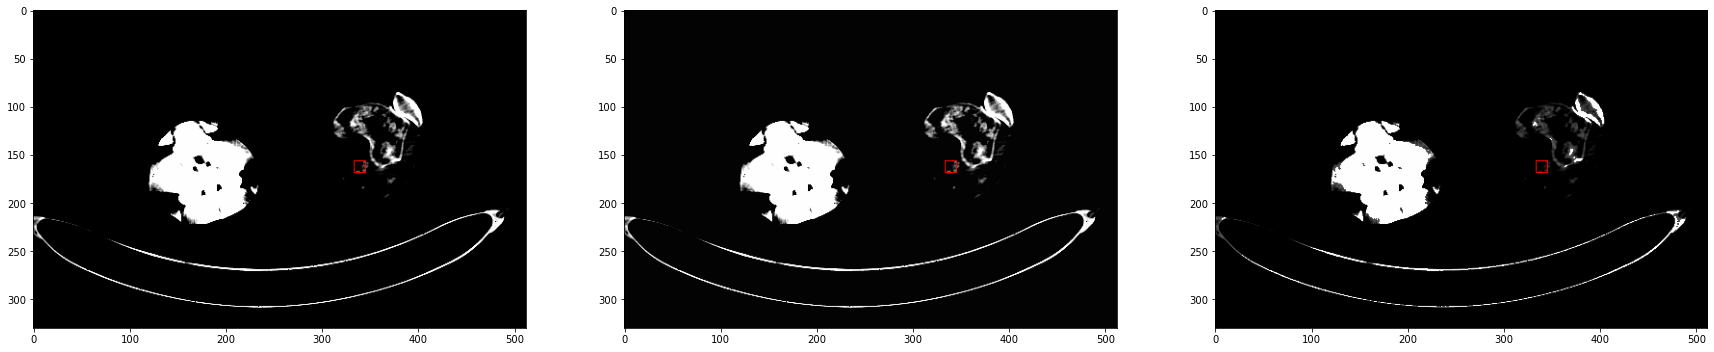

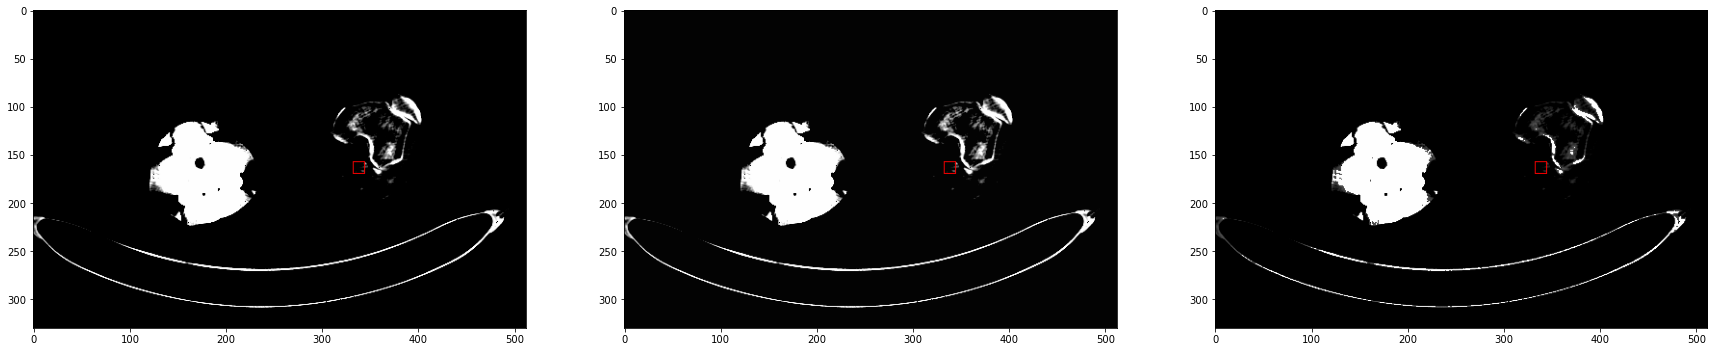

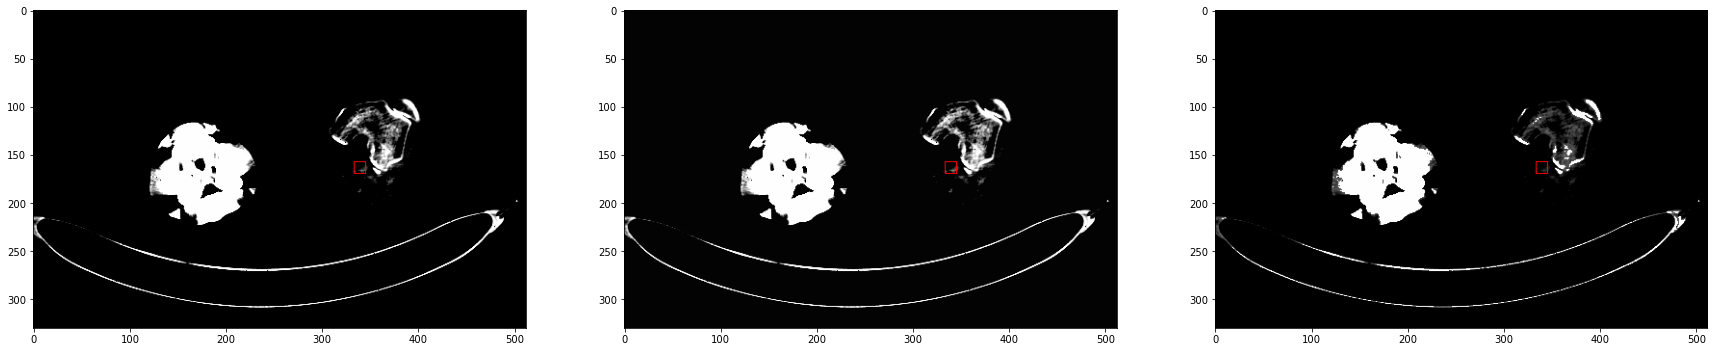

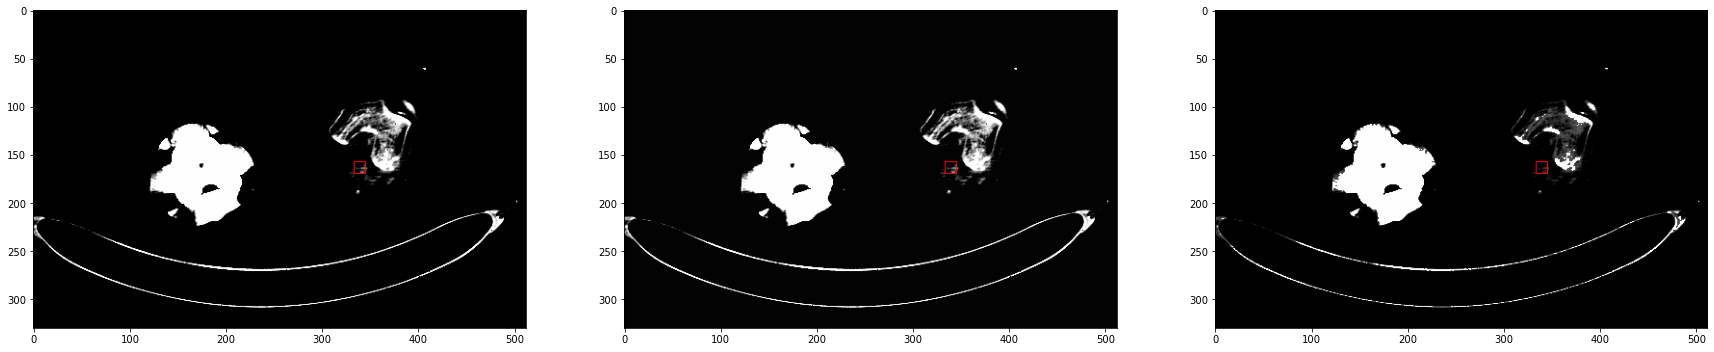

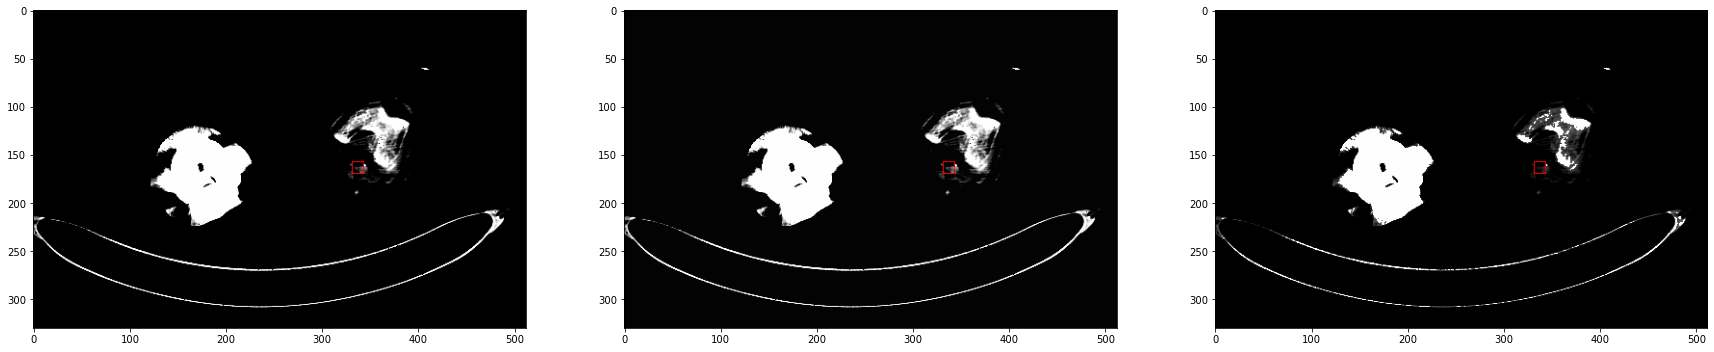

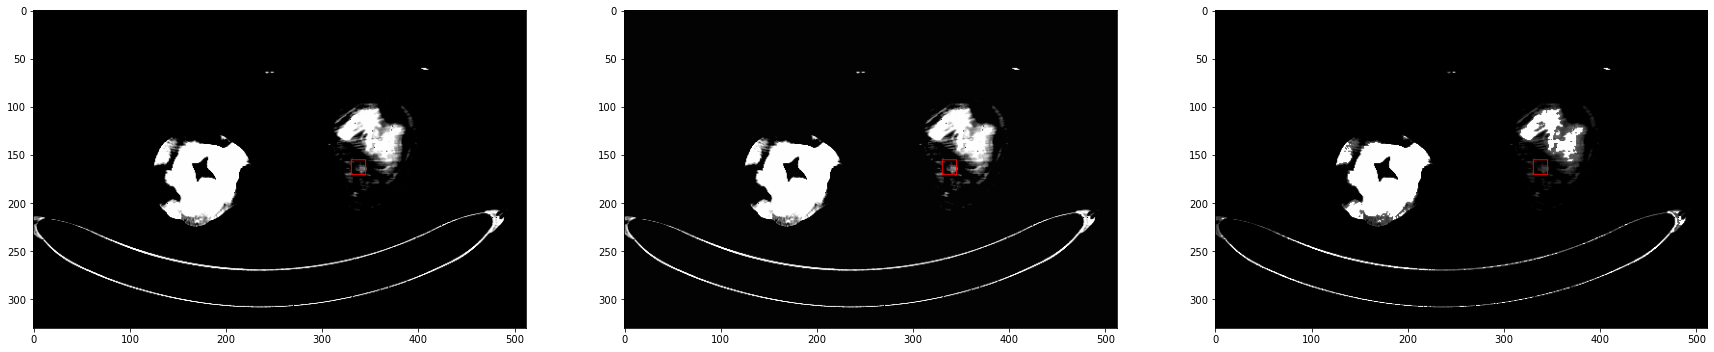

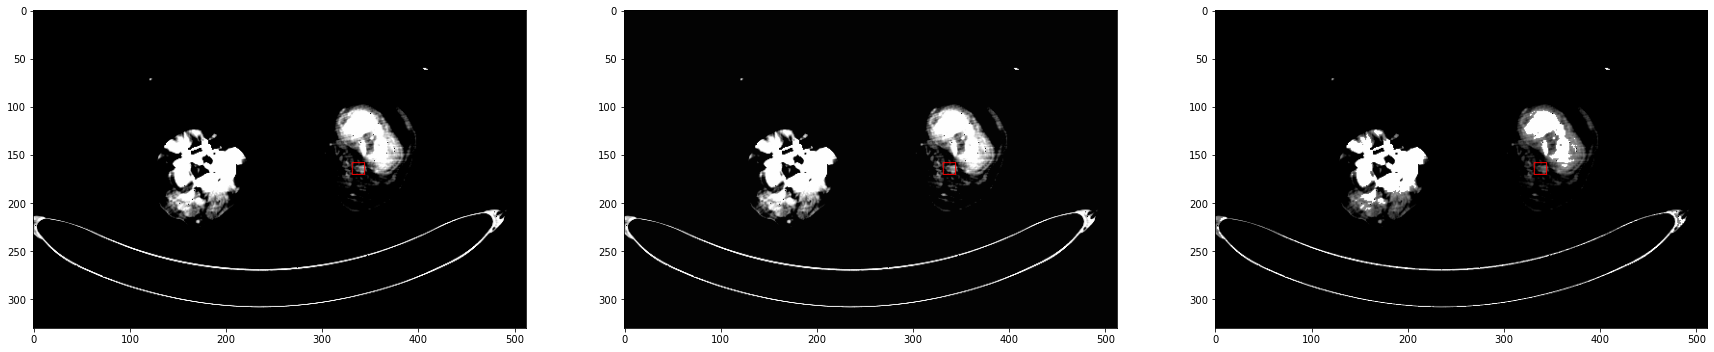

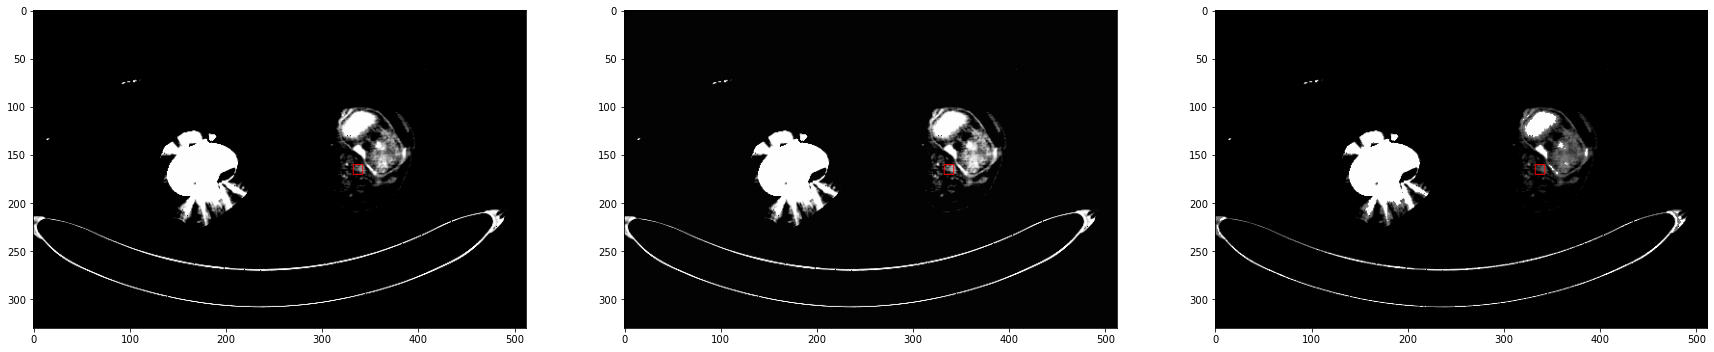

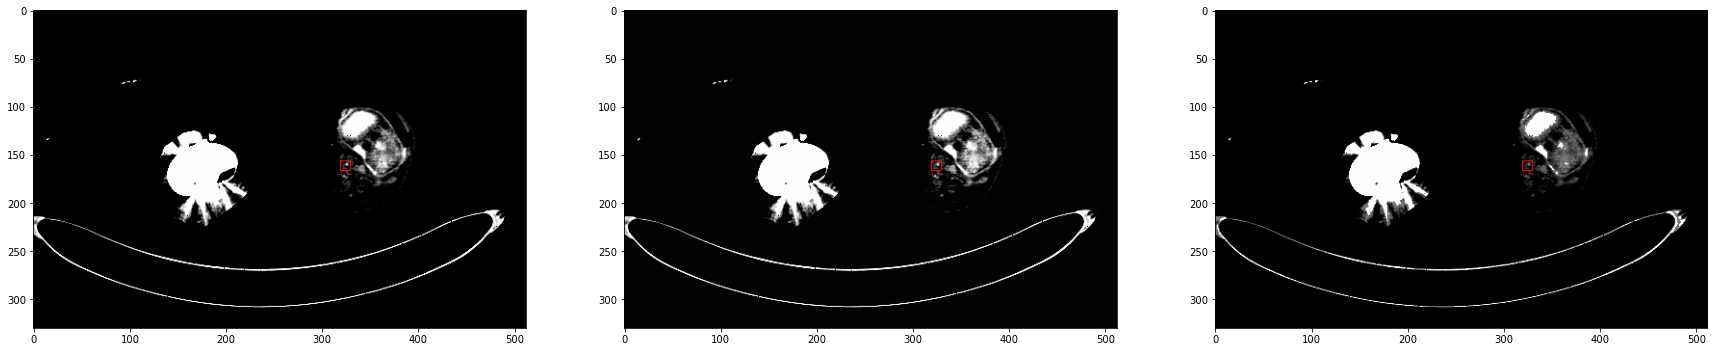

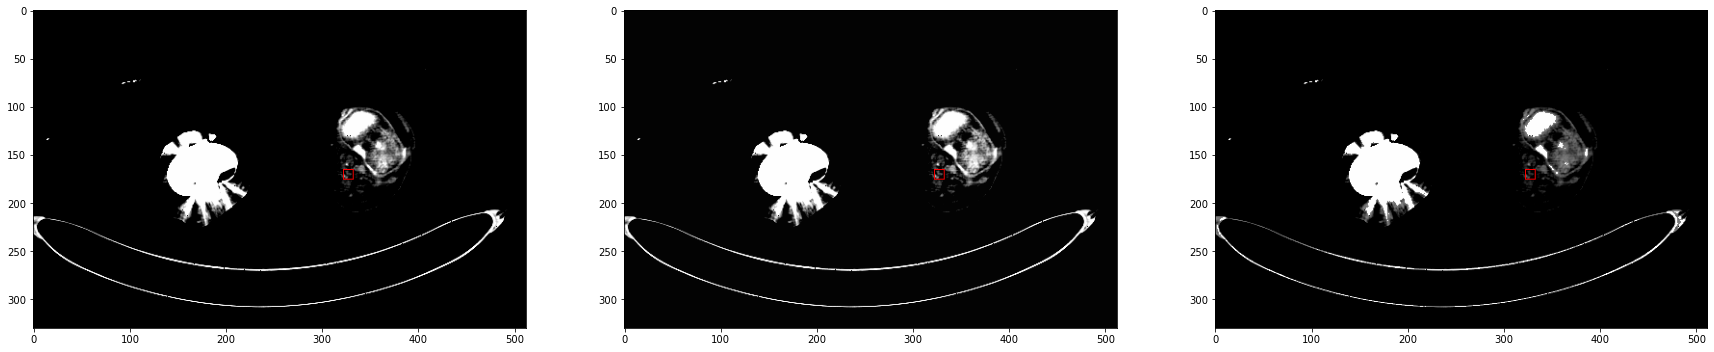

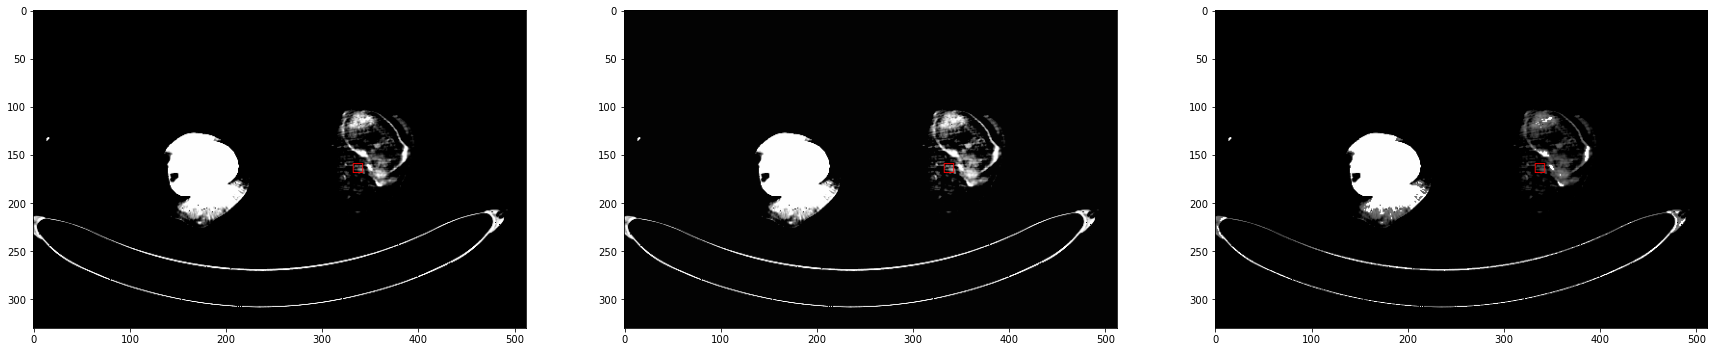

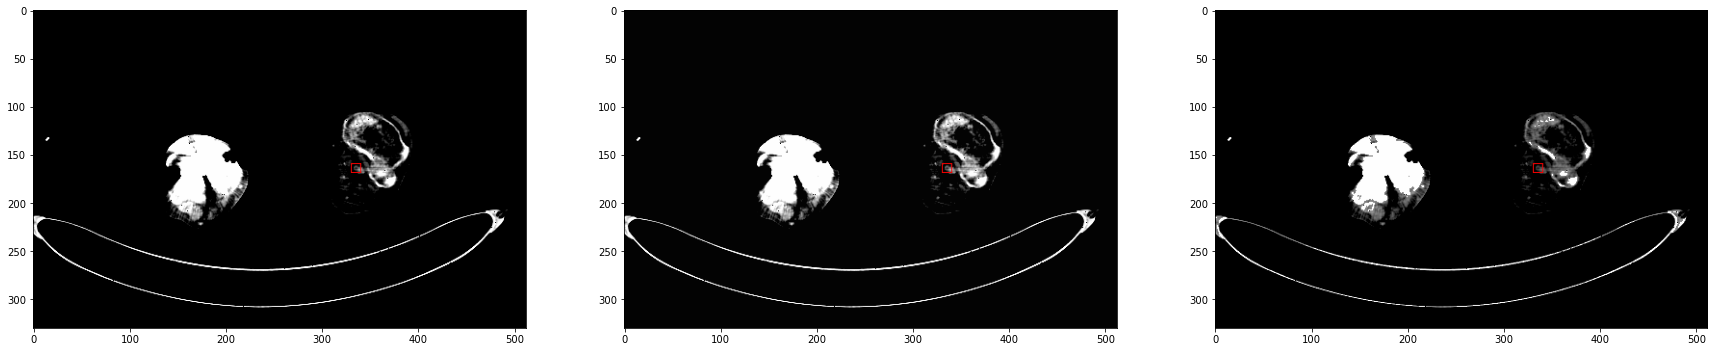

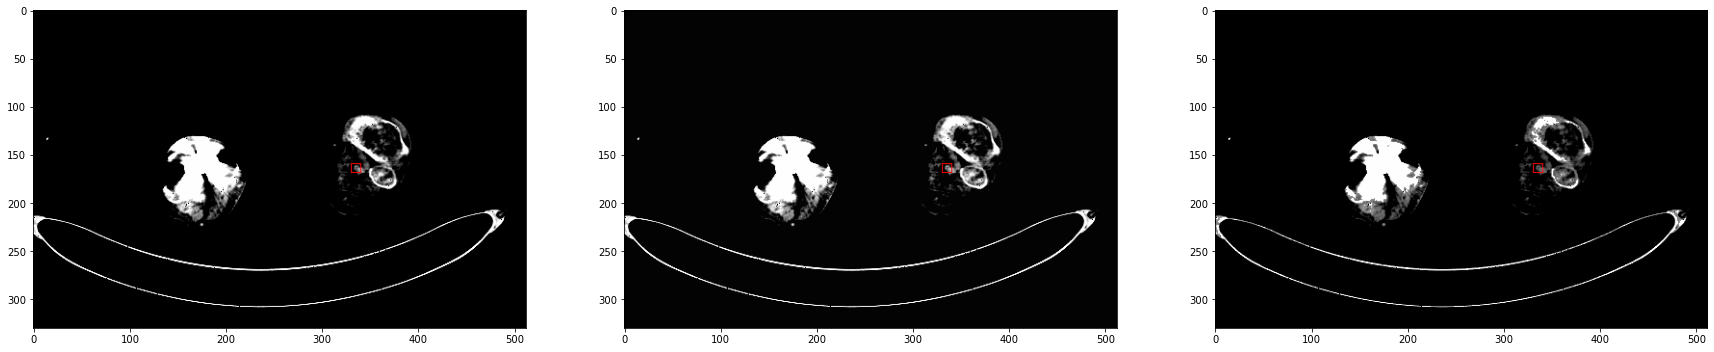

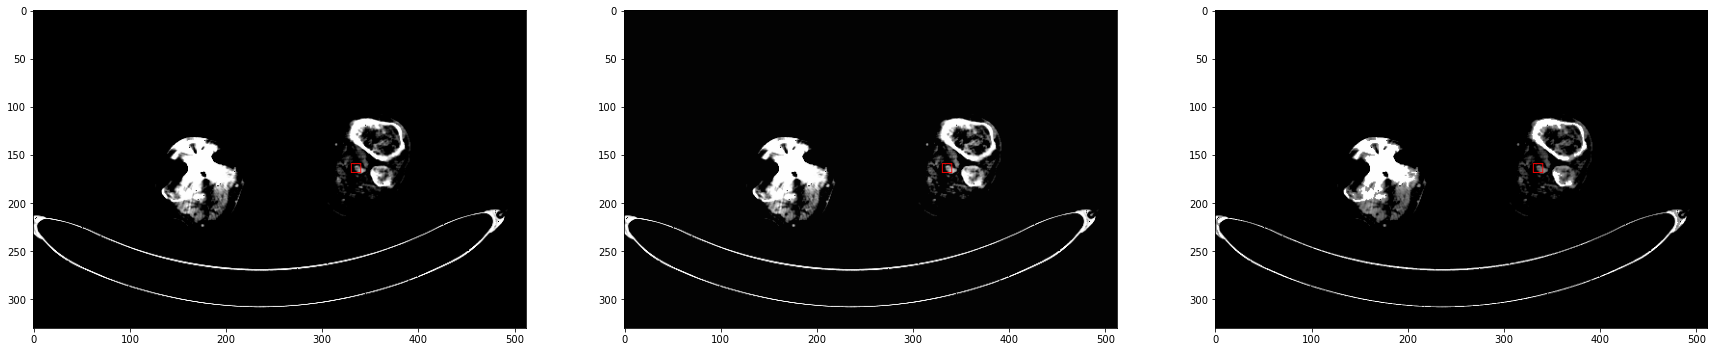

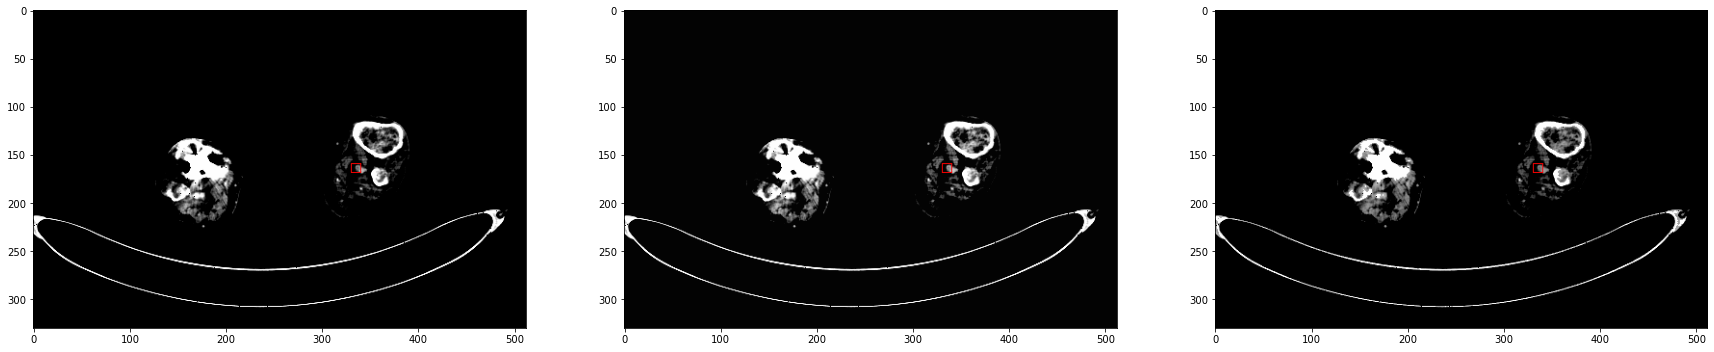

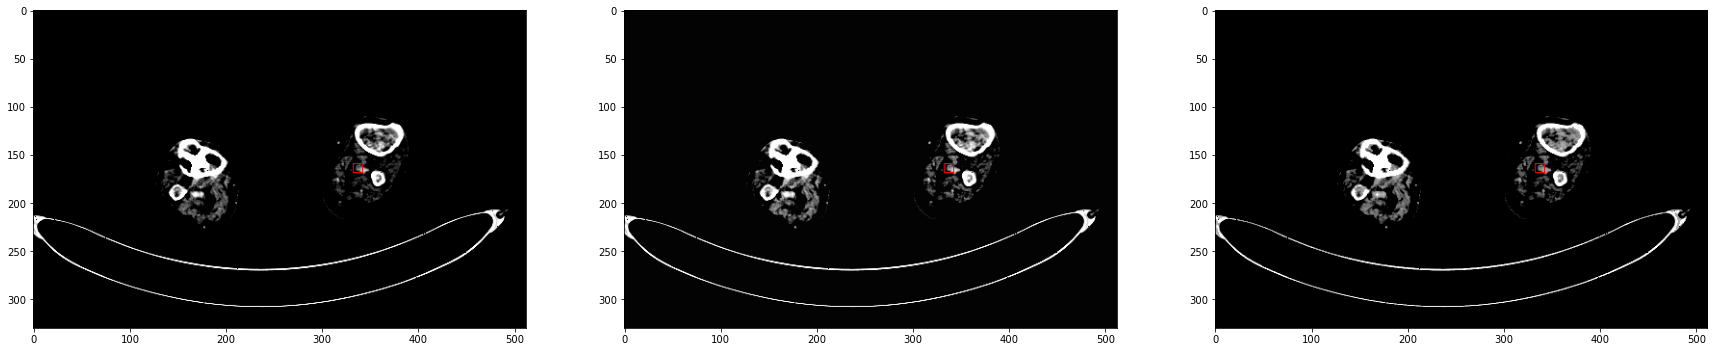

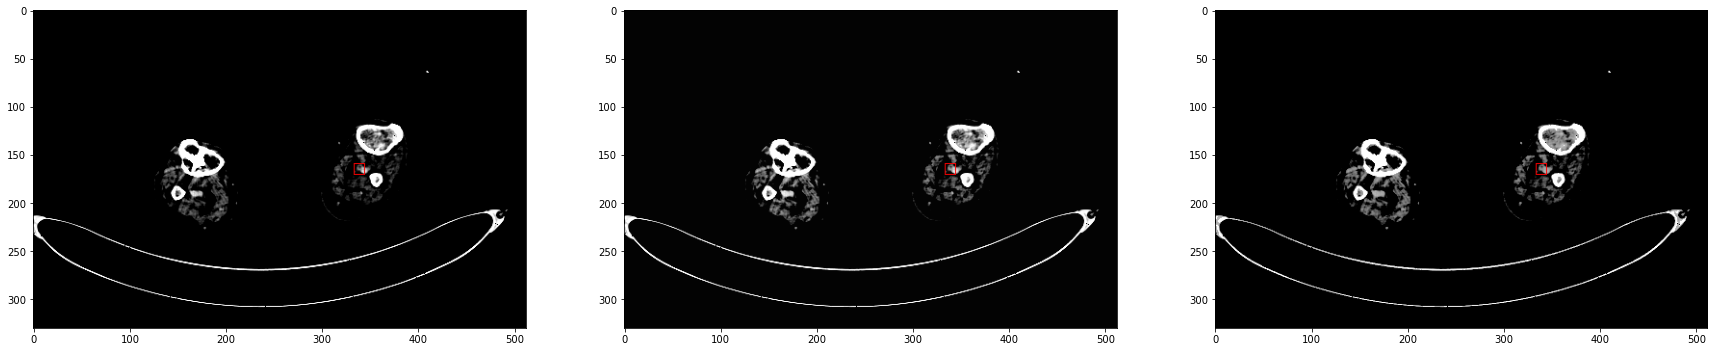

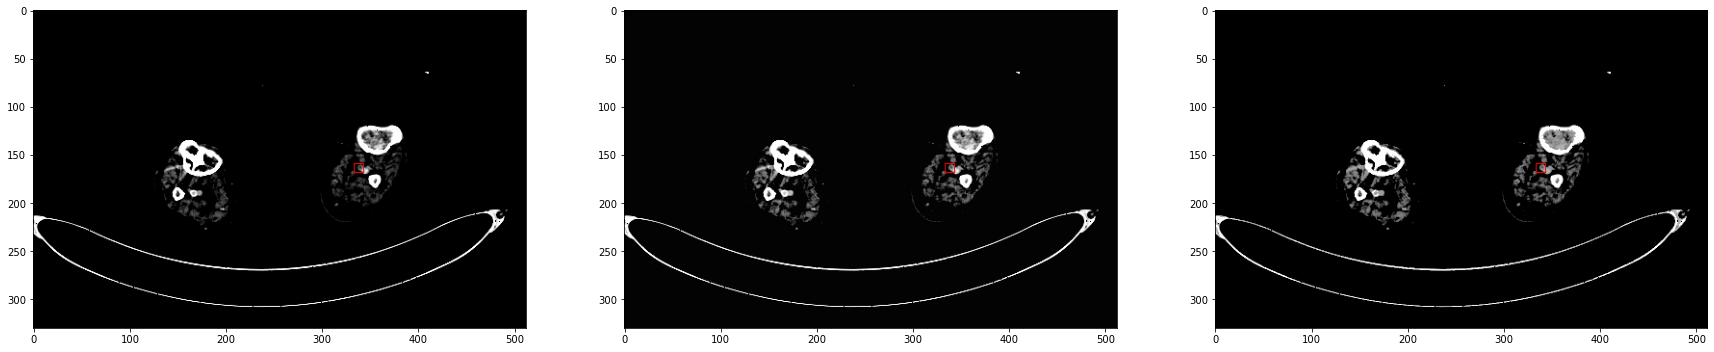

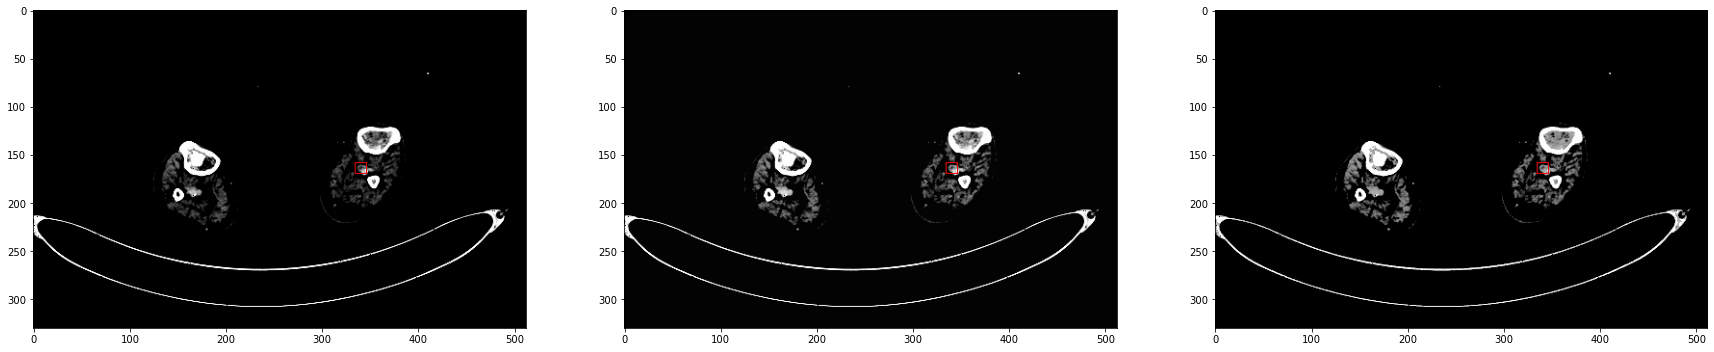

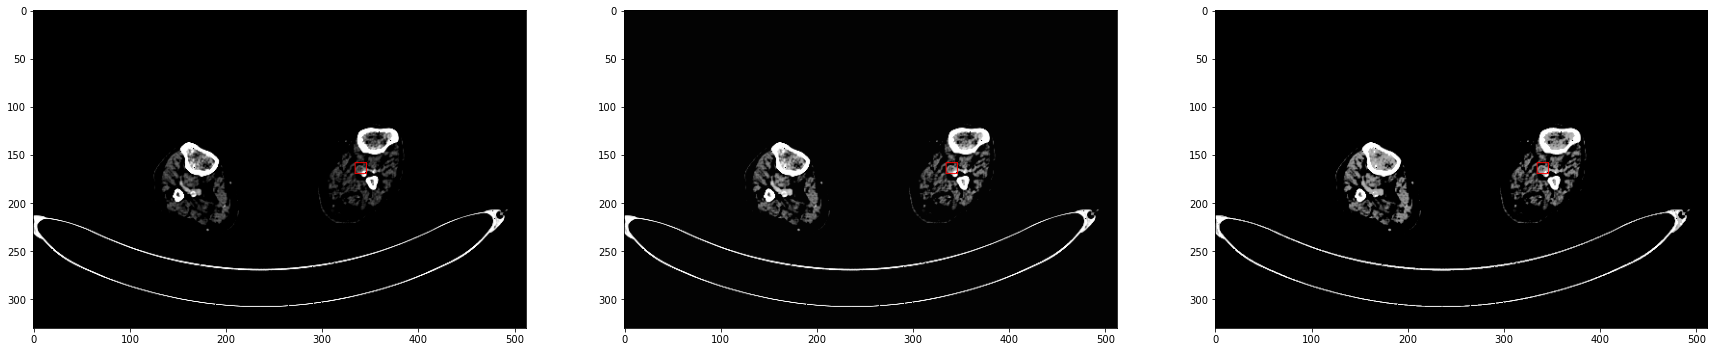

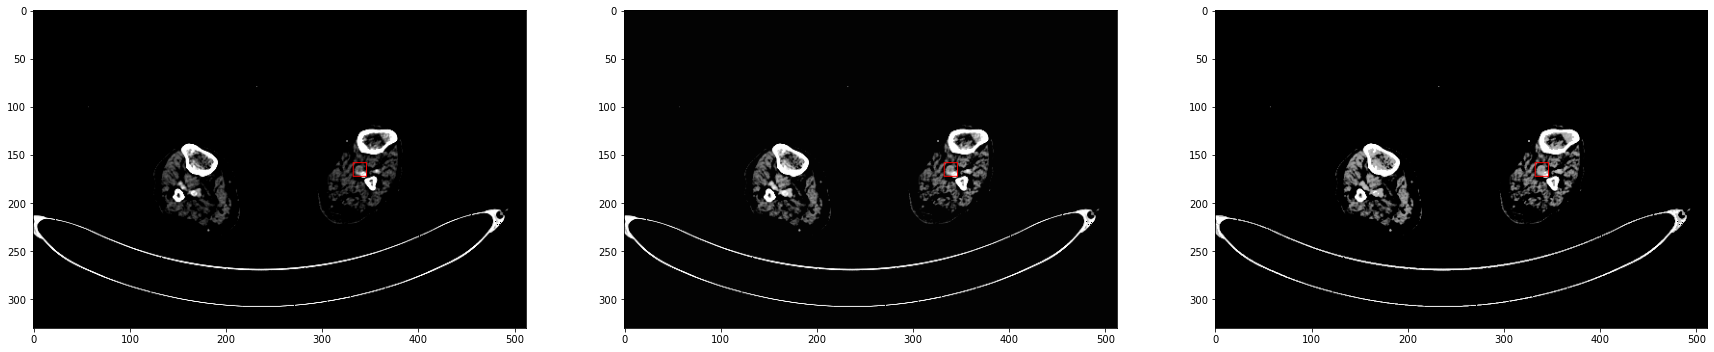

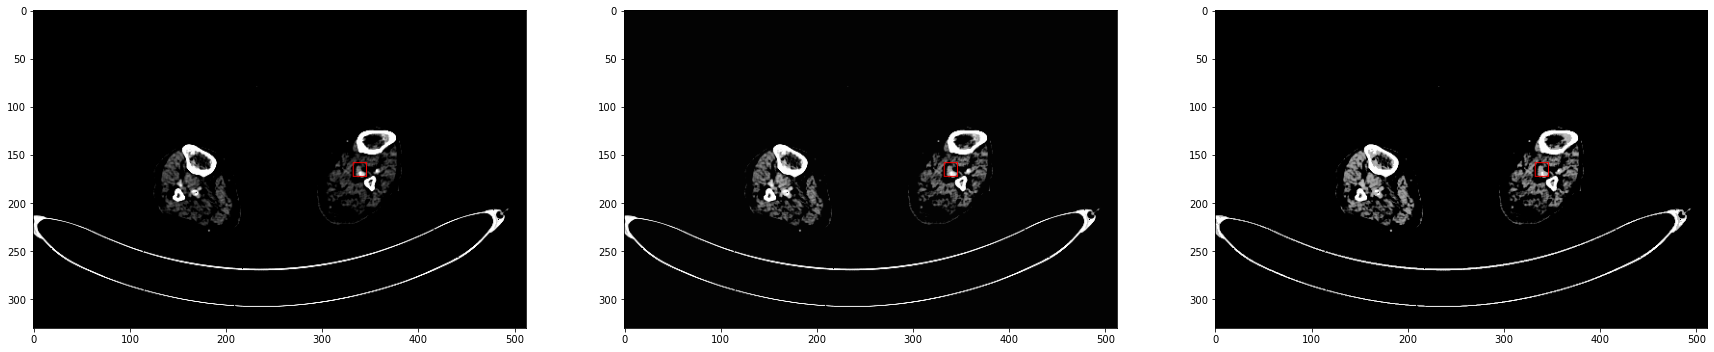

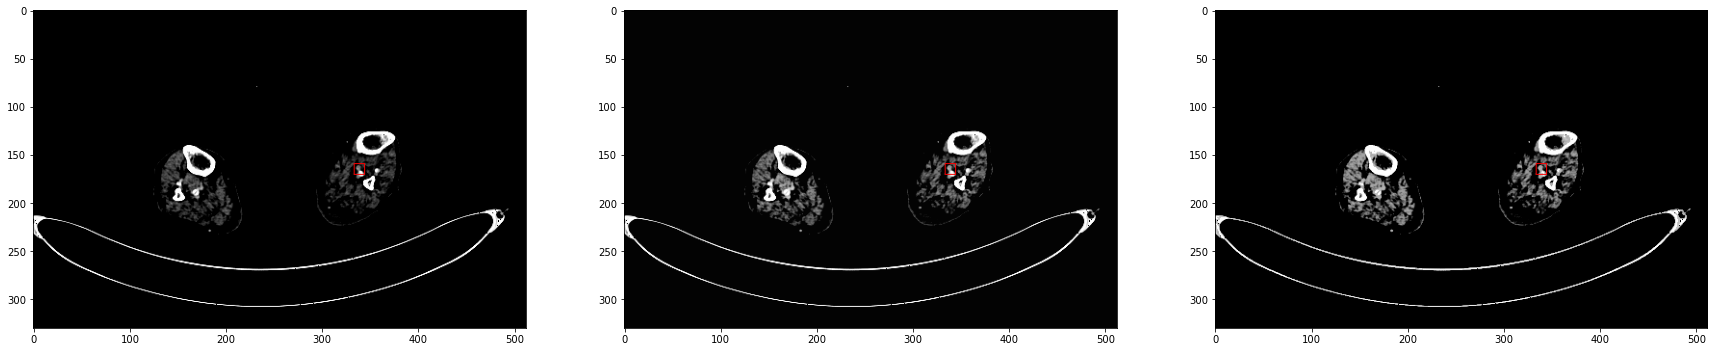

In [10]:
########roi 표시해서 비교하기

for oi in range(len(match_int)):

#     img=cv2.imread(img_list[oi], cv2.IMREAD_GRAYSCALE)
    img=cv2.imread(img_list[match_int[oi]], 1)

    img1=img.copy()
    img2=img.copy()

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # tileGridSize=> 한 번 히스토그램 균일화 할 떄 사이즈 -> 키우면 키울 수록 전체 equlalize와 가까워짐 => contrast 정도 조절 가능할 듯
    clahe_img=clahe.apply(img1[:,:,0])########0번 채널에만 -> grayscale로 안바꿔도 됨


    hist, bins = np.histogram(img.ravel(), 256, [0, 256])#히스토그램 구하기
    cdf = hist.cumsum() # np array 1차원으로->각 멤버값 누적하여 합한 값을 멤버로하는 np 1차원 배열 생성

    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m-cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf= np.ma.filled(cdf_m, 0).astype('uint8')
    ehis_img=cdf[img2]

    zero = np.zeros([330,512,3], dtype=np.uint8)

    zero[:,:,0] = clahe_img
    zero[:,:,1] = clahe_img
    zero[:,:,2] = clahe_img

    clahe_img = zero

#     for rn in range(roi_names):
#         r=roi_names[rn][0:roi_names[rn].rindex('.roi')]

#         lt=rois[r]['left'], rois[r]['top']-120
#         rd=lt[0]+rois[r]['width'], lt[1]+rois[r]['height']
    r=roi_names[oi][0:roi_names[oi].rindex('.roi')]

    lt=rois[r]['left'], rois[r]['top']-120
    rd=lt[0]+rois[r]['width'], lt[1]+rois[r]['height']



    cv2.rectangle(clahe_img, lt, rd, (255, 0, 0), 1)
    cv2.rectangle(img, lt, rd, (255, 0, 0), 1)
    cv2.rectangle(ehis_img, lt, rd, (255, 0, 0), 1)
    

    plt.figure(figsize=(30,30))
#     print('number:', match_int[oi])
    plt.subplot(1,3,1)

    plt.imshow(img, cmap='gray')
    plt.subplot(1,3,2)

    plt.imshow(clahe_img, cmap='gray')
    plt.subplot(1,3,3)

    plt.imshow(ehis_img, cmap='gray')


In [46]:
save_clahe='../data/try3/img_clahe/'
save_ehis='../data/try3/img_ehis/'

In [61]:
print(save_clahe+'/'+img_list[oi][img_list[oi].rindex('\\')+1:])
print(save_clahe+'/'+p_name[a])

../data/try3/img_clahe/01013843_0000.png
../data/try3/img_clahe/01013843


In [66]:
#####이미지 바로 저장
for a in range(len(img_names)):
# for a in range(1):
    img_list=sorted(glob.glob(img_names[a]+'/*'))
    os.mkdir(save_clahe+'/'+p_name[a])
    os.mkdir(save_ehis+'/'+p_name[a])
    
    for oi in range(len(img_list)):
#     for oi in range(1):

    #     img=cv2.imread(img_list[oi], cv2.IMREAD_GRAYSCALE)
        img=cv2.imread(img_list[oi], 1)

        img1=img.copy()
        img2=img.copy()

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # tileGridSize=> 한 번 히스토그램 균일화 할 떄 사이즈 -> 키우면 키울 수록 전체 equlalize와 가까워짐 => contrast 정도 조절 가능할 듯
        clahe_img=clahe.apply(img1[:,:,0])########0번 채널에만 -> grayscale로 안바꿔도 됨


        hist, bins = np.histogram(img.ravel(), 256, [0, 256])#히스토그램 구하기
        cdf = hist.cumsum() # np array 1차원으로->각 멤버값 누적하여 합한 값을 멤버로하는 np 1차원 배열 생성

        cdf_m = np.ma.masked_equal(cdf, 0)
        cdf_m = (cdf_m-cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
        cdf= np.ma.filled(cdf_m, 0).astype('uint8')
        ehis_img=cdf[img2]

        zero = np.zeros([330,512,3], dtype=np.uint8)

        zero[:,:,0] = clahe_img
        zero[:,:,1] = clahe_img
        zero[:,:,2] = clahe_img

        clahe_img = zero
        
        io.imsave(save_clahe+'/'+p_name[a]+'/'+img_list[oi][img_list[oi].rindex('\\')+1:], clahe_img)
        io.imsave(save_ehis+'/'+p_name[a]+'/'+img_list[oi][img_list[oi].rindex('\\')+1:], ehis_img)
        
        


C:\Users\ST-USER\anaconda3\envs\zzaem\lib\site-packages\ipykernel_launcher.py:37: UserWarning: ../data/try3/img_clahe/01537731/01537731_0239.png is a low contrast image
C:\Users\ST-USER\anaconda3\envs\zzaem\lib\site-packages\ipykernel_launcher.py:38: UserWarning: ../data/try3/img_ehis/01537731/01537731_0239.png is a low contrast image
C:\Users\ST-USER\anaconda3\envs\zzaem\lib\site-packages\ipykernel_launcher.py:37: UserWarning: ../data/try3/img_clahe/01537731/01537731_0240.png is a low contrast image
C:\Users\ST-USER\anaconda3\envs\zzaem\lib\site-packages\ipykernel_launcher.py:38: UserWarning: ../data/try3/img_ehis/01537731/01537731_0240.png is a low contrast image
C:\Users\ST-USER\anaconda3\envs\zzaem\lib\site-packages\ipykernel_launcher.py:37: UserWarning: ../data/try3/img_clahe/01537731/01537731_0241.png is a low contrast image
C:\Users\ST-USER\anaconda3\envs\zzaem\lib\site-packages\ipykernel_launcher.py:38: UserWarning: ../data/try3/img_ehis/01537731/01537731_0241.png is a low cont

In [48]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)
    Display data as an image; i.e. on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. Note: For actually displaying
    a grayscale image set up the color mapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
    Parameters
    ----------
    X : array-like or PIL image
        The image data. Supported array shapes are:
    
        - (M, N): an image with scalar data. The values are mapped to
          colors using normalization and a colormap. See parameters *norm*,
          *cmap*, *vmin*, *vmax*.
        - (M, N, 3): an image with RGB values (0-1 float or 

0068-0204-0316


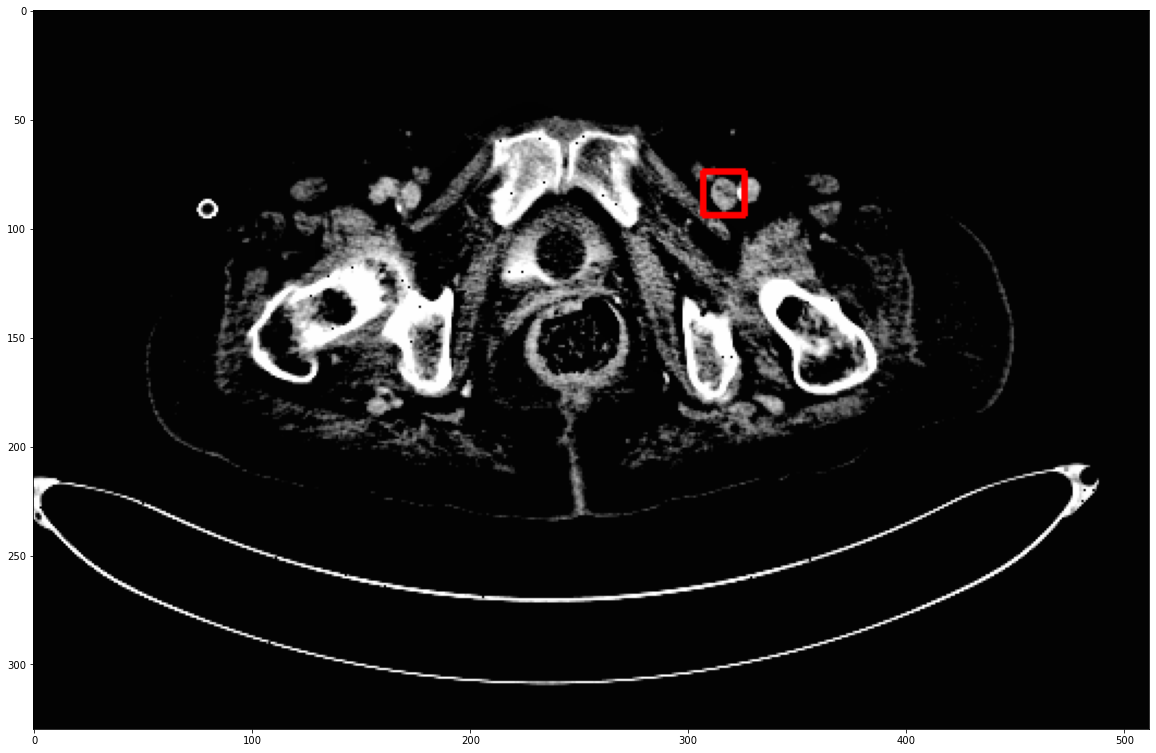

In [86]:
################rec만 컬러
# for oi in range(len(img_list)):
for oi in range(1):
#     img=cv2.imread(img_list[67], cv2.IMREAD_GRAYSCALE)
    img=cv2.imread(img_list[67])

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img1=img.copy()
    img2=img.copy()

    clahe_img=clahe.apply(img[:,:,0])
    
    zero = np.zeros([330,512,3], dtype=np.uint8)
    
    zero[:,:,0] = clahe_img
    zero[:,:,1] = clahe_img
    zero[:,:,2] = clahe_img
    
    clahe_img = zero

#     for rn in range(roi_names):
#         r=roi_names[rn][0:roi_names[rn].rindex('.roi')]

#         lt=rois[r]['left'], rois[r]['top']-120
#         rd=lt[0]+rois[r]['width'], lt[1]+rois[r]['height']
    r=roi_names[0][0:roi_names[0].rindex('.roi')]
    print(r)
#     match number=r[,4]

    lt=rois[r]['left'], rois[r]['top']-120
    rd=lt[0]+rois[r]['width'], lt[1]+rois[r]['height']



    cv2.rectangle(clahe_img, lt, rd, (255, 0, 0), 2)
    cv2.rectangle(img, lt, rd, (255, 0, 0), 2)

    #res= np.hstack((img, clahe_img))###비교하려고
    plt.figure(figsize=(20,20))
    plt.imshow(clahe_img, cmap='gray')
    

In [75]:
clahe_img=clahe.apply(img[:,:,0])

print(clahe_img.shape)

#clahe_img = np.concatenate([clahe_img,clahe_img,clahe_img], axis=2)

print(clahe_img.shape)

(330, 512)
(330, 512)
